# Problem Statement

An e-commerce company aims to analyze customer reviews to extract valuable insights and improve overall customer satisfaction. The company seeks to perform sentiment analysis to understand customer sentiments, topic modeling to identify key themes in the reviews, and text classification to categorize reviews into relevant topics. The insights gained from this analysis will guide strategic decision-making and enhance the company's product offerings and customer experience.

Key Objectives:

Perform sentiment analysis on customer reviews to gauge overall customer sentiment towards the products.
Utilize topic modeling techniques to identify prominent themes and topics discussed in the reviews.
Develop a text classification model to categorize reviews into predefined topics or categories.

# Dataset

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* <b>Clothing ID:</b> Integer Categorical variable that refers to the specific piece being reviewed.
* <b>Age:</b> Positive Integer variable of the reviewers age.
* <b>Title:</b> String variable for the title of the review.
* <b>Review Text:</b> String variable for the review body.
* <b>Rating:</b> Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* <b>Recommended IND:</b> Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* <b>Positive Feedback Count:</b> Positive Integer documenting the number of other customers who found this review positive.
* <b>Division Name:</b> Categorical name of the product high level division.
* <b>Department Name:</b> Categorical name of the product department name.
* <b>Class Name:</b> Categorical name of the product class name.

# Importing necessary libraries

In [ ]:
#importing libraries
#importing numpy,pandas,matplotlib,seaborn and warnings library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importing NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#importing re library
import re

import random

# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')
import scipy.sparse

# Import string module
import string

# Importing necessary packages from scikit learn
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Importing necessary packages from imblearn
from imblearn.over_sampling import RandomOverSampler,SMOTE


from tqdm import trange


from collections import Counter

import tensorflow as tf
from tensorflow.keras import layers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Downloading and loading Data

In [ ]:
# link : https://drive.google.com/file/d/1OiUInCC9c4n4EjBHCuzAuyaW6v1FgHxs/view?usp=sharing

In [ ]:
!gdown 1OiUInCC9c4n4EjBHCuzAuyaW6v1FgHxs

Downloading...
From: https://drive.google.com/uc?id=1OiUInCC9c4n4EjBHCuzAuyaW6v1FgHxs
To: /content/review.csv
100% 8.48M/8.48M [00:00<00:00, 44.2MB/s]


In [ ]:
df = pd.read_csv("review.csv")

In [ ]:
df

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

# Exploratory Data Analysis

## Checking structure,null values, Duplicates

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df = df.drop(['Unnamed: 0', 'Title'], axis=1)
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Review Text              22628 non-null  object
 3   Rating                   22628 non-null  int64 
 4   Recommended IND          22628 non-null  int64 
 5   Positive Feedback Count  22628 non-null  int64 
 6   Division Name            22628 non-null  object
 7   Department Name          22628 non-null  object
 8   Class Name               22628 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

Clothing ID  Age                                        Review Text  \
0              767   33  Absolutely wonderful - silky and sexy and comf...   
1             1080   34  Love this dress!  it's sooo pretty.  i happene...   
2             1077   60  I had such high hopes for this dress and reall...   
3             1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4              847   47  This shirt is very flattering to all due to th...   
...            ...  ...                                                ...   
22622         1104   34  I was very happy to snag this dress at such a ...   
22623          862   48  It reminds me of maternity clothes. soft, stre...   
22624         1104   31  This fit well, but the top was very see throug...   
22625         1084   28  I bought this dress for a wedding i have this ...   
22626         1104   52  This dress in a lovely platinum is feminine an...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
0           4                1                        0       Initmates   
1           5                1                        4         General   
2           3                0                        0         General   
3           5                1                        0  General Petite   
4           5                1                        6         General   
...       ...              ...                      ...             ...   
22622       5                1                        0  General Petite   
22623       3                1                        0  General Petite   
22624       3                0                        1  General Petite   
22625       3                1                        2         General   
22626       5                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
22622         Dresses    Dresses  
22623            Tops      Knits  
22624         Dresses    Dresses  
22625         Dresses    Dresses  
22626         Dresses    Dresses  

[22627 rows x 9 columns]

In [ ]:
print(df['Review Text'].sample(10,random_state=42).values)

['Just purchased tonight and love i this little jacket.  the embroidery and beading down the sleeves is such an interesting touch yet neutral enough to wear with just about everything this fall.  runs tts.'
 'This skirt is stunning. like the other reviewer, i believe this is probably the most beautiful thing in my closet. the colors are just striking. it is also flattering - i find some skirts can kind of pouf out around the hips and add bulk, this one lays nice and flat and looks great. the material is very soft and simple and i love the frayed edges at the bottom. i am just between 5"3" and 5\'4" and weigh 112 lbs; i took an xs and it fits perfectly, so it seems true to size. only thing, if you are'
 "Ordered this on a whim while taking advantage of a promotion, and now need one in every color! the weight and cut is perfect for fall/winter/summer - not too heavy, but not sheer/tissue thin; fitted enough to look super cute with leggings or skinny jeans. fabric has a nice quality feel 

## Cleaning reviews by eliminating urls,punctuations,hashtags,stopwords etc

In [ ]:
#Function for cleaning text
def clean_text(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs in the text
    Text = re.sub('@\S+', '  ', Text)  # remove mentions in the text
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  # remove punctuations in the text
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc in the text
    Text = re.sub('#\S+', '', Text)  # remove hashtags in the text
    Text = re.sub(r'[^\x00-\x7f\d+]',r' ',Text) # remove  all characters in the text that are not in the ASCII range,numbers
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace in the text
    return Text

In [ ]:
df['Review Text Cleaned'] = df['Review Text'].apply(lambda x:clean_text(x))

In [ ]:
print(df['Review Text Cleaned'].sample(10,random_state=42).values)

['Just purchased tonight and love i this little jacket the embroidery and beading down the sleeves is such an interesting touch yet neutral enough to wear with just about everything this fall runs tts '
 'This skirt is stunning like the other reviewer i believe this is probably the most beautiful thing in my closet the colors are just striking it is also flattering i find some skirts can kind of pouf out around the hips and add bulk this one lays nice and flat and looks great the material is very soft and simple and i love the frayed edges at the bottom i am just between 5 3 and 5 4 and weigh 112 lbs i took an xs and it fits perfectly so it seems true to size only thing if you are'
 'Ordered this on a whim while taking advantage of a promotion and now need one in every color the weight and cut is perfect for fall winter summer not too heavy but not sheer tissue thin fitted enough to look super cute with leggings or skinny jeans fabric has a nice quality feel to it i have similar shirts

* Removing stop words from reviews

In [ ]:
Sentences = df['Review Text Cleaned'].values
Set_Of_StopWords = set(stopwords.words('english')+['``',"''"])

In [ ]:
def stop(x):
  doc = nlp(x)
  Words = []
  for word in doc:
    if word.text not in Set_Of_StopWords and word.text not in string.punctuation:
            Words.append(word.text)
  return ' '.join(Words)

In [ ]:
df['Review Text Cleaned'] = df['Review Text Cleaned'].apply(lambda x:stop(x))

* Converting words with capital letter to lowercase so that we dont have duplicate instances of same words for our tokenizers

In [ ]:
def lower(text):
  sent = ' '.join([x.lower() for x in text.split()])
  return sent

In [ ]:
lower(df['Review Text Cleaned'][102])

'i bought lovely silk velvet shirt quot sky quot color teal blue side sky blue disappointed definitely darker appears photo still luxurious well made beauty sassy appeal drapes like snake slithering body comes attitude'

In [ ]:
df['Review Text Cleaned'][102]

'I bought lovely silk velvet shirt quot sky quot color teal blue side sky blue disappointed definitely darker appears photo still luxurious well made beauty sassy appeal drapes like snake slithering body comes attitude'

In [ ]:
# Apply the lower function to the 'text_column'
df['Review Text Cleaned'] = df['Review Text Cleaned'].apply(lower)

## Predicting Sentiment of reviews using sklearn's SentimentIntensityAnalyzer


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['Review Text Cleaned'][0]

'absolutely wonderful silky sexy comfortable'

* We can see this is a positive review lets test our SentimentIntensityAnalyzer

In [ ]:
sia.polarity_scores(df['Review Text Cleaned'][0])

{'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'compound': 0.8991}

* Our SentimentIntensityAnalyzer also gave this review a positive score

* Lets create a new feature with the sentiments as positive or negative

* Labelling positive:1, negative:0

In [ ]:
df['scores'] = df['Review Text Cleaned'].apply(lambda review: sia.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['sentiment'] = df['compound'].apply(lambda c: 1 if c >=0 else 0)

df.head()

Clothing ID  Age                                        Review Text  \
0          767   33  Absolutely wonderful - silky and sexy and comf...   
1         1080   34  Love this dress!  it's sooo pretty.  i happene...   
2         1077   60  I had such high hopes for this dress and reall...   
3         1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4          847   47  This shirt is very flattering to all due to th...   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  \
0        Intimate  Intimates   
1         Dresses    Dresses   
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   

                                 Review Text Cleaned  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store gla...   
2  i high hopes dress really wanted work initiall...   
3  i love love love jumpsuit fun flirty fabulous ...   
4  this shirt flattering due adjustable front tie...   

                                              scores  compound  sentiment  
0  {'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'comp...    0.8991          1  
1  {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...    0.9710          1  
2  {'neg': 0.038, 'neu': 0.693, 'pos': 0.269, 'co...    0.9062          1  
3  {'neg': 0.171, 'neu': 0.185, 'pos': 0.644, 'co...    0.9464          1  
4  {'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'comp...    0.9062          1

In [ ]:
df['sentiment'].value_counts()

1    22009
0      618
Name: sentiment, dtype: int64

In [ ]:
np.round((df['sentiment'].value_counts()/len(df))*100,2)

1    97.27
0     2.73
Name: sentiment, dtype: float64

* we can see we have a very imbalanced set of reviews
* 97.27% of our reviews are positive and 2.73% of our reviews are negative
* In a real world senario with such imbalances dataset, this would probably be an outlier detection problem rather than classification problem
* But for this project i will try treat this as a classification problem

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Review Text Cleaned', 'scores', 'compound', 'sentiment'],
      dtype='object')

* Lets remove unwanted columns

## Further analysis

In [ ]:
df = df.drop(['scores', 'compound'],axis=1)

In [ ]:
df

Clothing ID  Age                                        Review Text  \
0              767   33  Absolutely wonderful - silky and sexy and comf...   
1             1080   34  Love this dress!  it's sooo pretty.  i happene...   
2             1077   60  I had such high hopes for this dress and reall...   
3             1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4              847   47  This shirt is very flattering to all due to th...   
...            ...  ...                                                ...   
22622         1104   34  I was very happy to snag this dress at such a ...   
22623          862   48  It reminds me of maternity clothes. soft, stre...   
22624         1104   31  This fit well, but the top was very see throug...   
22625         1084   28  I bought this dress for a wedding i have this ...   
22626         1104   52  This dress in a lovely platinum is feminine an...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
0           4                1                        0       Initmates   
1           5                1                        4         General   
2           3                0                        0         General   
3           5                1                        0  General Petite   
4           5                1                        6         General   
...       ...              ...                      ...             ...   
22622       5                1                        0  General Petite   
22623       3                1                        0  General Petite   
22624       3                0                        1  General Petite   
22625       3                1                        2         General   
22626       5                1                       22  General Petite   

      Department Name Class Name  \
0            Intimate  Intimates   
1             Dresses    Dresses   
2             Dresses    Dresses   
3             Bottoms      Pants   
4                Tops    Blouses   
...               ...        ...   
22622         Dresses    Dresses   
22623            Tops      Knits   
22624         Dresses    Dresses   
22625         Dresses    Dresses   
22626         Dresses    Dresses   

                                     Review Text Cleaned  sentiment  
0            absolutely wonderful silky sexy comfortable          1  
1      love dress sooo pretty happened find store gla...          1  
2      i high hopes dress really wanted work initiall...          1  
3      i love love love jumpsuit fun flirty fabulous ...          1  
4      this shirt flattering due adjustable front tie...          1  
...                                                  ...        ...  
22622  i happy snag dress great price easy slip flatt...          1  
22623  it reminds maternity clothes soft stretchy shi...          1  
22624  this fit well top see never would worked glad ...          1  
22625  i bought dress wedding summer cute unfortunate...          1  
22626  this dress lovely platinum feminine fits perfe...          1  

[22627 rows x 11 columns]

In [ ]:
len(df['Clothing ID'].unique())

1172

* As there are 1172 unique values for this feature it would not be of much use to us for preparing a model
* Therefore dropping this feature

In [ ]:
df['Age'].describe()

count    22627.000000
mean        43.283157
std         12.328378
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

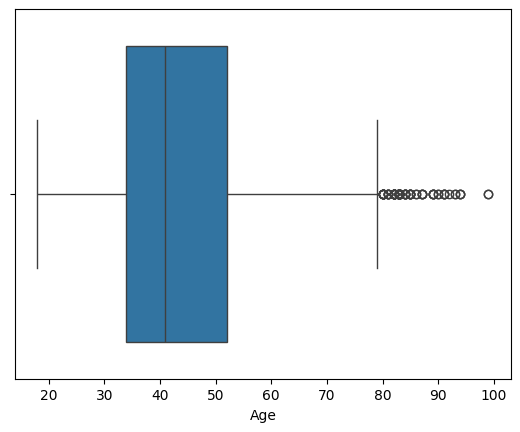

In [ ]:
sns.boxplot(x='Age',data=df)

In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit



In [ ]:
col = 'Age'

upper, lower = outliers(df, col)
(len(df[(df[col] > lower) & (df[col] < upper)])/len(df)*100)

99.45640164405356

* Removing outliers

In [ ]:
len(df)

22627

In [ ]:
df = df[(df[col] > lower) & (df[col] < upper)]

In [ ]:
len(df)

22504

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Review Text Cleaned', 'sentiment'],
      dtype='object')

<Axes: ylabel='Frequency'>

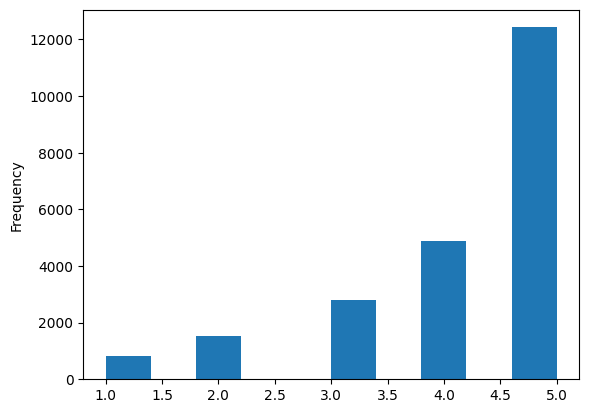

In [ ]:
df['Rating'].plot(kind='hist')

* Looks like most of the reviews are in range(3,5)
* We can say that there are a lot of positive reviews
* Our prediction using SentimentIntensityAnalyzer gave us the same conclusion

In [ ]:
df['Recommended IND'].value_counts()

1    18416
0     4088
Name: Recommended IND, dtype: int64

In [ ]:
np.round((df['Recommended IND'].value_counts()/len(df))*100,2)

1    81.83
0    18.17
Name: Recommended IND, dtype: float64

* We can see 81.83 people recomended the products they reviewed which means they liked it

In [ ]:
df.groupby('Recommended IND')['sentiment'].sum()

Recommended IND
0     3673
1    18214
Name: sentiment, dtype: int64

* People who liked the product are more likely to recommend it to others

<Axes: >

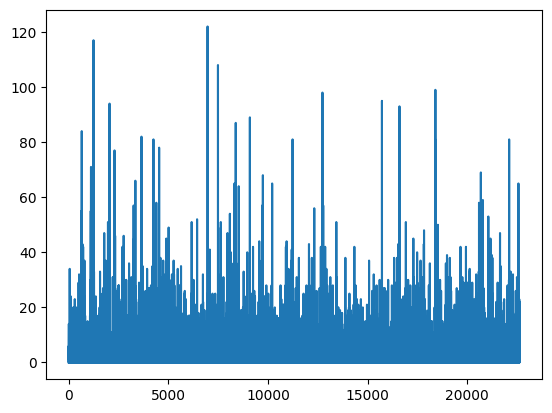

In [ ]:
df['Positive Feedback Count'].plot()

In [ ]:
df.groupby('sentiment')['Positive Feedback Count'].sum()

sentiment
0     2033
1    57223
Name: Positive Feedback Count, dtype: int64

* We can see reviews which have positive sentiment have more positive feedback count, this again shows that our results from SentimentIntensityAnalyzer are good

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Review Text Cleaned', 'sentiment'],
      dtype='object')

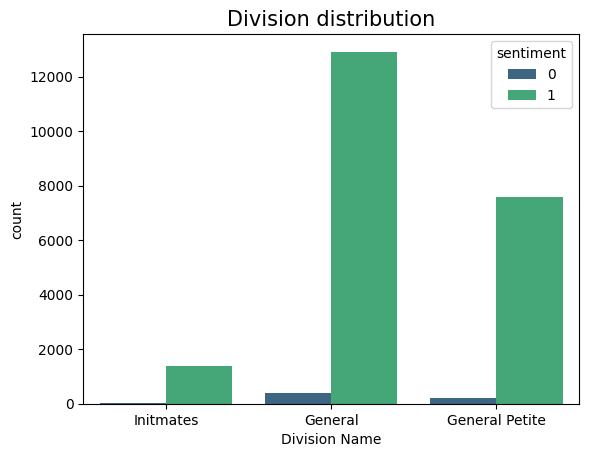

In [ ]:
sns.countplot(x='Division Name', palette='viridis', data=df,hue='sentiment')
plt.title('Division distribution', size=15)
plt.show()

* Looks like most of the products are from General and General Petite

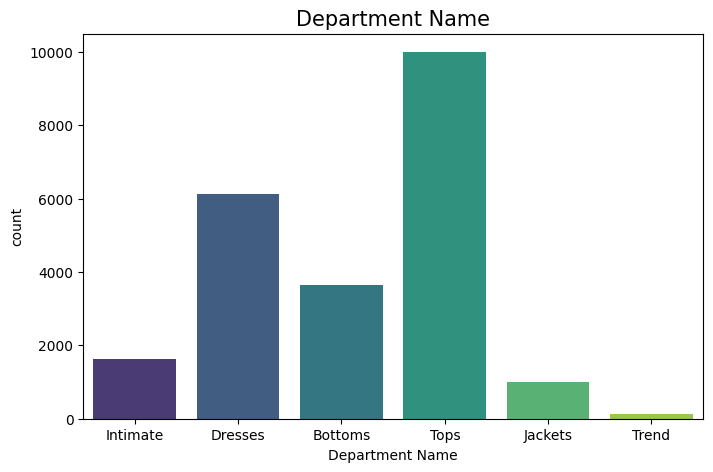

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department Name', palette='viridis', data=df)
plt.title('Department Name', size=15)
plt.show()

* We can see most of then products are from Tops,Dresses and Bottoms

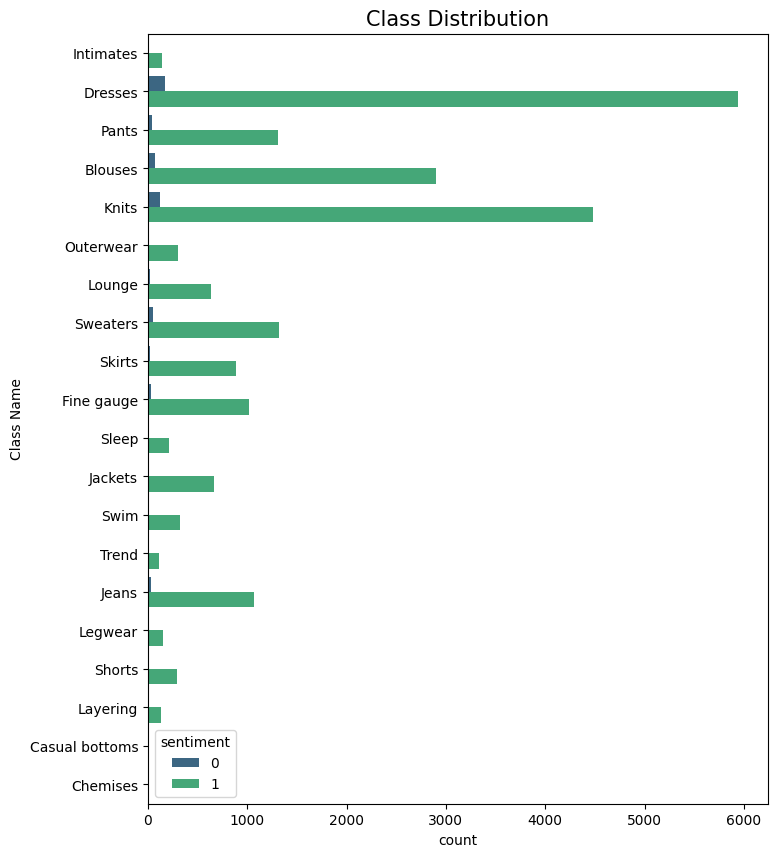

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='viridis', data=df,hue='sentiment')
plt.title('Class Distribution', size=15)
plt.show()

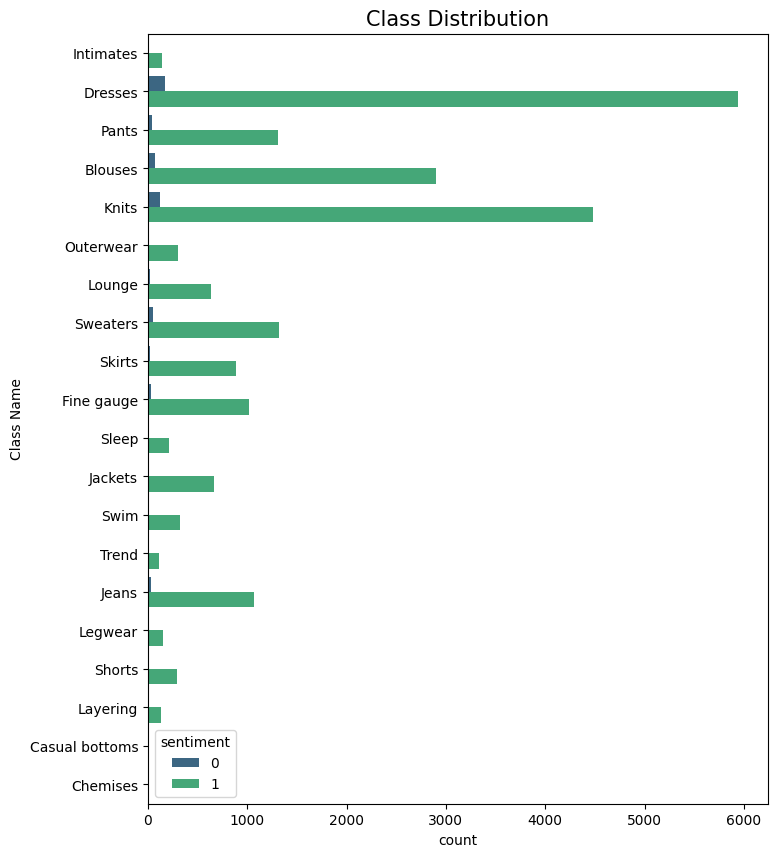

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='viridis', data=df,hue='sentiment')
plt.title('Class Distribution', size=15)
plt.show()

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Review Text Cleaned', 'sentiment'],
      dtype='object')

# Feature Engineering and further analysis

## Processing text

In [ ]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
22622    I was very happy to snag this dress at such a ...
22623    It reminds me of maternity clothes. soft, stre...
22624    This fit well, but the top was very see throug...
22625    I bought this dress for a wedding i have this ...
22626    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22504, dtype: object

In [ ]:
df['review_len'] = df['Review Text'].apply(lambda x:len(x))

In [ ]:
df['review_len'].describe()

count    22504.000000
mean       308.728759
std        143.923071
min          9.000000
25%        186.000000
50%        302.000000
75%        459.000000
max        508.000000
Name: review_len, dtype: float64

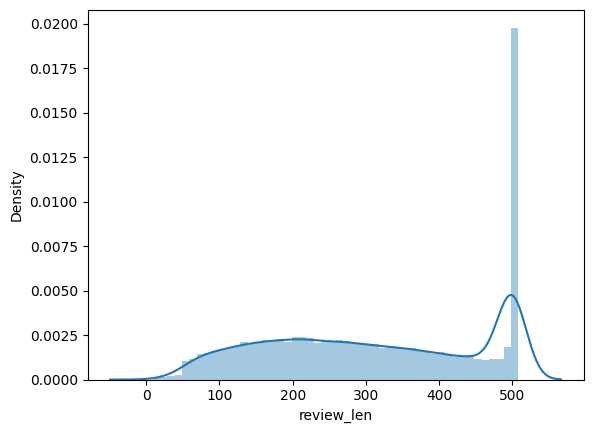

In [ ]:
sns.distplot(x=df['review_len'], bins=50)
plt.xlabel('review_len')
plt.show()

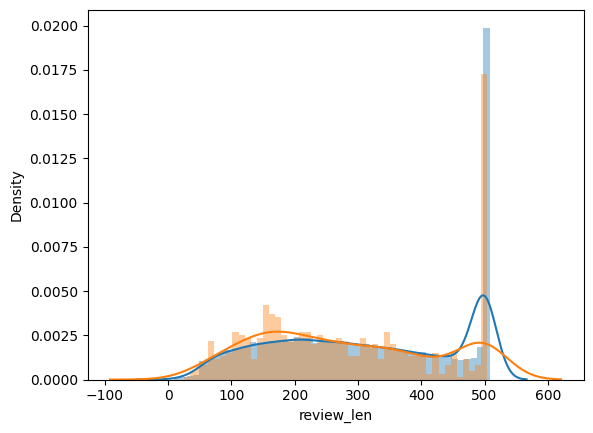

In [ ]:
sns.distplot(x=df[df['sentiment']==1]['review_len'], bins=50)
sns.distplot(x=df[df['sentiment']==0]['review_len'], bins=50)
plt.xlabel('review_len')
plt.show()

<Axes: xlabel='review_len'>

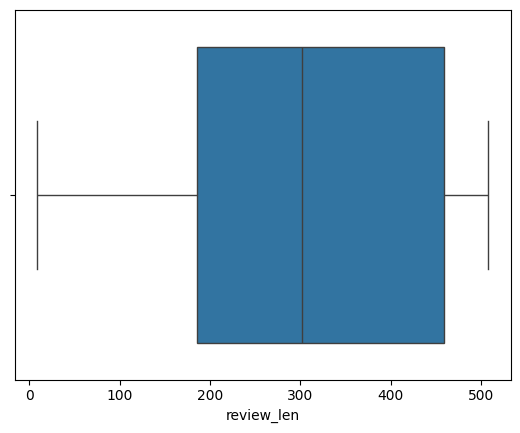

In [ ]:
sns.boxplot(x='review_len',data=df)

<Axes: xlabel='sentiment', ylabel='review_len'>

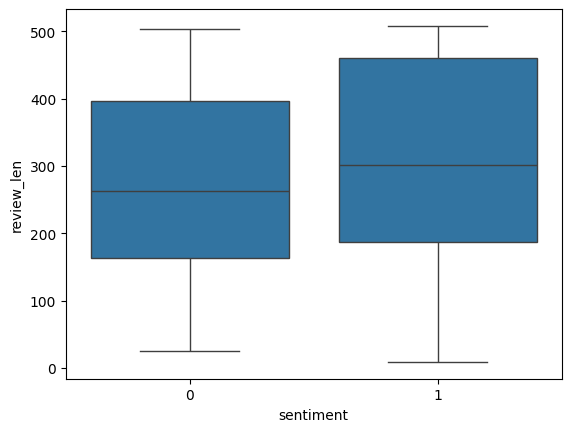

In [ ]:
sns.boxplot(x = 'sentiment', y='review_len',data=df)

* We can see that positive reviews are slightly longer, lets confirm this by hypothesis testing using t-test, because we have a very imbalanced dataset

In [ ]:
#  ttest code

# sentiment vs review_len

from scipy.stats import ttest_ind
# h0(Null hypothesis): review_len for sentiment  0 = review_len for sentiment 1
# ha(Alternate hypothesis): review_len for sentiment  0 < review_len for sentiment 1

S0_len = df[df['sentiment']==0]['review_len']
S1_len = df[df['sentiment']==1]['review_len']

s,p = ttest_ind(S0_len,S1_len,alternative='less')

print(f'p = {p}')

if p<0.05:
  print('reject null hypothesis')
  print('correct hypothesis : review_len for sentiment 0 < review_len for sentiment 1')
else:
  print('failed to reject null hypothesis')
  print('correct hypothesis : review_len for sentiment 0 = review_len for sentiment 1')



p = 3.232142019847717e-06
reject null hypothesis
correct hypothesis : review_len for sentiment 0 < review_len for sentiment 1


## Word count analysis

**Word Count**: Number of words in a review

This code block adds a new column 'Word_count' to the DataFrame 'data'. The column contains the word count of each review in the 'Review' column, which is calculated using the 'word_count' function, and returns first 10 columns of data frame

In [ ]:
df['Word_count'] = df['Review Text'].apply(lambda x:len(x.split()))
df.head(10)

Clothing ID  Age                                        Review Text  \
0          767   33  Absolutely wonderful - silky and sexy and comf...   
1         1080   34  Love this dress!  it's sooo pretty.  i happene...   
2         1077   60  I had such high hopes for this dress and reall...   
3         1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4          847   47  This shirt is very flattering to all due to th...   
5         1080   49  I love tracy reese dresses, but this one is no...   
6          858   39  I aded this in my basket at hte last mintue to...   
7          858   39  I ordered this in carbon for store pick up, an...   
8         1077   24  I love this dress. i usually get an xs but it ...   
9         1077   34  I'm 5"5' and 125 lbs. i ordered the s petite t...   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   
5       2                0                        4         General   
6       5                1                        1  General Petite   
7       4                1                        4  General Petite   
8       5                1                        0         General   
9       5                1                        0         General   

  Department Name Class Name  \
0        Intimate  Intimates   
1         Dresses    Dresses   
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   
7            Tops      Knits   
8         Dresses    Dresses   
9         Dresses    Dresses   

                                 Review Text Cleaned  sentiment  review_len  \
0        absolutely wonderful silky sexy comfortable          1          53   
1  love dress sooo pretty happened find store gla...          1         303   
2  i high hopes dress really wanted work initiall...          1         500   
3  i love love love jumpsuit fun flirty fabulous ...          1         124   
4  this shirt flattering due adjustable front tie...          1         192   
5  i love tracy reese dresses one petite 5 feet t...          1         488   
6  i aded basket hte last mintue see would look l...          1         496   
7  i ordered carbon store pick ton stuff always t...          1         482   
8  i love dress usually get xs runs little snug b...          1         166   
9  i 5 5 125 lbs ordered petite make sure length ...          1         360   

   Word_count  
0           8  
1          62  
2          98  
3          22  
4          36  
5          98  
6         101  
7          97  
8          34  
9          72

**Mean word length**: Average length of words

This code block calculates the mean word length for each review in the 'Review' column of the dataframe 'data' using a lambda function to split each review into individual words and then calculates the average length of each word. The resulting mean word lengths are added to a new column in the dataframe called 'mean_word_length'. and returns first 10 columns of data frame

In [ ]:
df['mean_word_length'] = df['Review Text'].map(lambda rev: np.round(np.mean([len(word) for word in rev.split()]),2))
df.head(10)

Clothing ID  Age                                        Review Text  \
0          767   33  Absolutely wonderful - silky and sexy and comf...   
1         1080   34  Love this dress!  it's sooo pretty.  i happene...   
2         1077   60  I had such high hopes for this dress and reall...   
3         1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4          847   47  This shirt is very flattering to all due to th...   
5         1080   49  I love tracy reese dresses, but this one is no...   
6          858   39  I aded this in my basket at hte last mintue to...   
7          858   39  I ordered this in carbon for store pick up, an...   
8         1077   24  I love this dress. i usually get an xs but it ...   
9         1077   34  I'm 5"5' and 125 lbs. i ordered the s petite t...   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   
5       2                0                        4         General   
6       5                1                        1  General Petite   
7       4                1                        4  General Petite   
8       5                1                        0         General   
9       5                1                        0         General   

  Department Name Class Name  \
0        Intimate  Intimates   
1         Dresses    Dresses   
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   
7            Tops      Knits   
8         Dresses    Dresses   
9         Dresses    Dresses   

                                 Review Text Cleaned  sentiment  review_len  \
0        absolutely wonderful silky sexy comfortable          1          53   
1  love dress sooo pretty happened find store gla...          1         303   
2  i high hopes dress really wanted work initiall...          1         500   
3  i love love love jumpsuit fun flirty fabulous ...          1         124   
4  this shirt flattering due adjustable front tie...          1         192   
5  i love tracy reese dresses one petite 5 feet t...          1         488   
6  i aded basket hte last mintue see would look l...          1         496   
7  i ordered carbon store pick ton stuff always t...          1         482   
8  i love dress usually get xs runs little snug b...          1         166   
9  i 5 5 125 lbs ordered petite make sure length ...          1         360   

   Word_count  mean_word_length  
0           8              5.75  
1          62              3.82  
2          98              4.11  
3          22              4.68  
4          36              4.36  
5          98              3.99  
6         101              3.92  
7          97              3.98  
8          34              3.91  
9          72              4.01

* The below code defines a function to plot 3 different plots for a feature given

In [ ]:
def plot(feature):
  plt.figure(figsize=(5,5))
  sns.displot(df[feature])
  plt.plot()
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df,x=feature)
  plt.plot()
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df,x='sentiment',y=feature)
  plt.plot()

<Figure size 500x500 with 0 Axes>

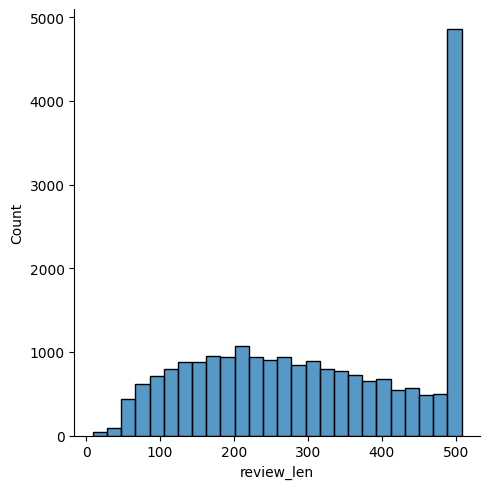

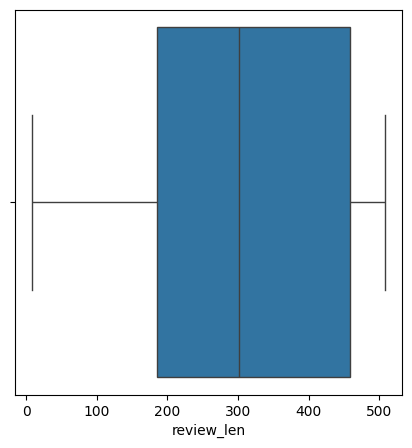

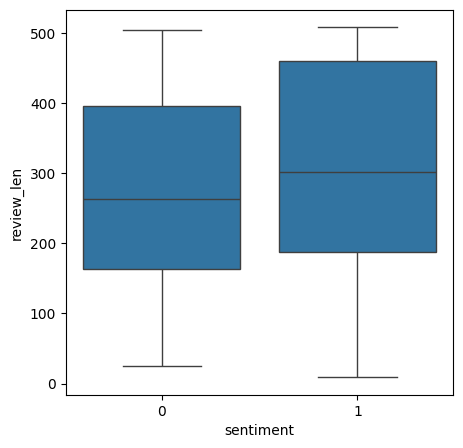

In [ ]:
plot('review_len')

<Figure size 500x500 with 0 Axes>

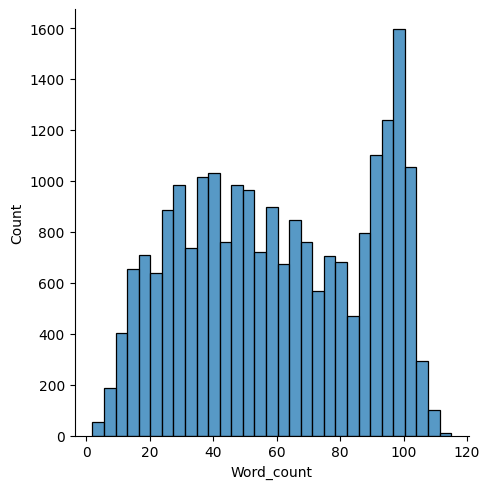

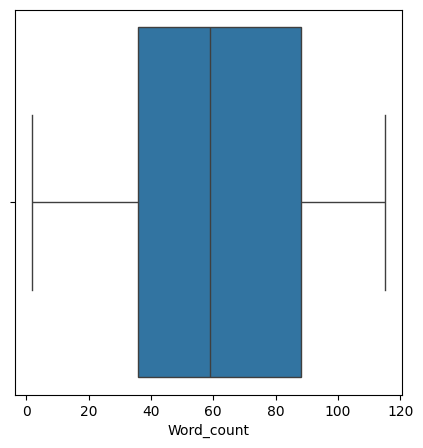

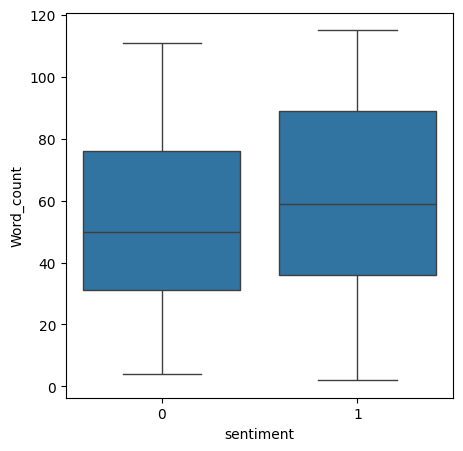

In [ ]:
plot('Word_count')

<Figure size 500x500 with 0 Axes>

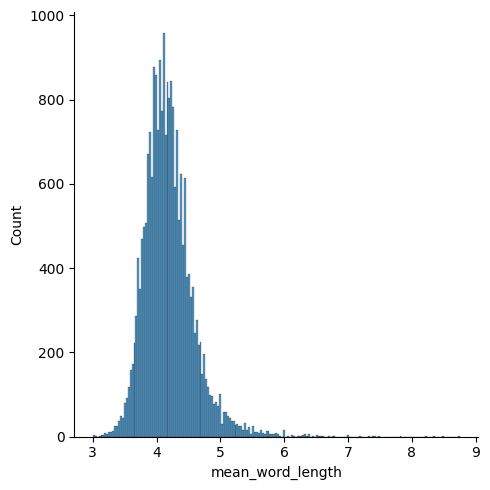

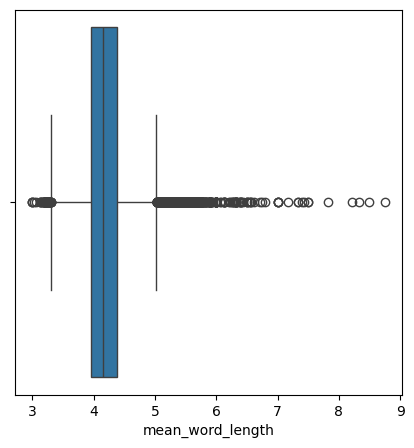

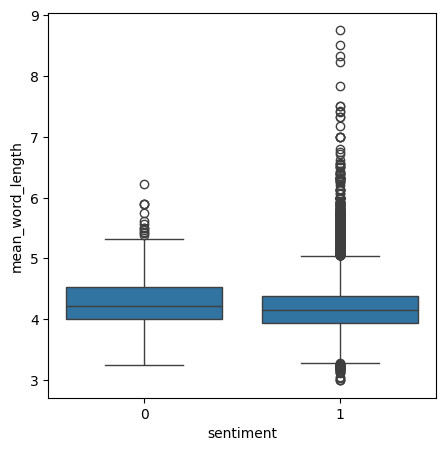

In [ ]:
plot('mean_word_length')

## Term Frequency Analysis
Examining the most frequently occuring words is one of the most popular systems of Text analytics. For example, in a sentiment analysis problem, a positive text is bound to have words like 'good', 'great', 'nice', etc. more in number than other words that imply otherwise.

In [ ]:
df

Clothing ID  Age                                        Review Text  \
0              767   33  Absolutely wonderful - silky and sexy and comf...   
1             1080   34  Love this dress!  it's sooo pretty.  i happene...   
2             1077   60  I had such high hopes for this dress and reall...   
3             1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4              847   47  This shirt is very flattering to all due to th...   
...            ...  ...                                                ...   
22622         1104   34  I was very happy to snag this dress at such a ...   
22623          862   48  It reminds me of maternity clothes. soft, stre...   
22624         1104   31  This fit well, but the top was very see throug...   
22625         1084   28  I bought this dress for a wedding i have this ...   
22626         1104   52  This dress in a lovely platinum is feminine an...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
0           4                1                        0       Initmates   
1           5                1                        4         General   
2           3                0                        0         General   
3           5                1                        0  General Petite   
4           5                1                        6         General   
...       ...              ...                      ...             ...   
22622       5                1                        0  General Petite   
22623       3                1                        0  General Petite   
22624       3                0                        1  General Petite   
22625       3                1                        2         General   
22626       5                1                       22  General Petite   

      Department Name Class Name  \
0            Intimate  Intimates   
1             Dresses    Dresses   
2             Dresses    Dresses   
3             Bottoms      Pants   
4                Tops    Blouses   
...               ...        ...   
22622         Dresses    Dresses   
22623            Tops      Knits   
22624         Dresses    Dresses   
22625         Dresses    Dresses   
22626         Dresses    Dresses   

                                     Review Text Cleaned  sentiment  \
0            absolutely wonderful silky sexy comfortable          1   
1      love dress sooo pretty happened find store gla...          1   
2      i high hopes dress really wanted work initiall...          1   
3      i love love love jumpsuit fun flirty fabulous ...          1   
4      this shirt flattering due adjustable front tie...          1   
...                                                  ...        ...   
22622  i happy snag dress great price easy slip flatt...          1   
22623  it reminds maternity clothes soft stretchy shi...          1   
22624  this fit well top see never would worked glad ...          1   
22625  i bought dress wedding summer cute unfortunate...          1   
22626  this dress lovely platinum feminine fits perfe...          1   

       review_len  Word_count  mean_word_length  
0              53           8              5.75  
1             303          62              3.82  
2             500          98              4.11  
3             124          22              4.68  
4             192          36              4.36  
...           ...         ...               ...  
22622         131          28              3.71  
22623         223          38              4.89  
22624         208          42              3.98  
22625         427          86              3.98  
22626         110          19              4.84  

[22504 rows x 14 columns]

The corpus function splits a string of text into a list of words.

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

This code is creating a new column 'sentence_corpus' in the dataframe 'df' that contains the review text converted into a list of individual words for each row. It uses the 'corpus' function to split each review into a list of words and returns first 10 columns of dataframe

In [ ]:
df['sentence_corpus'] = df['Review Text Cleaned'].apply(corpus)
df.head(10)

Clothing ID  Age                                        Review Text  \
0          767   33  Absolutely wonderful - silky and sexy and comf...   
1         1080   34  Love this dress!  it's sooo pretty.  i happene...   
2         1077   60  I had such high hopes for this dress and reall...   
3         1049   50  I love, love, love this jumpsuit. it's fun, fl...   
4          847   47  This shirt is very flattering to all due to th...   
5         1080   49  I love tracy reese dresses, but this one is no...   
6          858   39  I aded this in my basket at hte last mintue to...   
7          858   39  I ordered this in carbon for store pick up, an...   
8         1077   24  I love this dress. i usually get an xs but it ...   
9         1077   34  I'm 5"5' and 125 lbs. i ordered the s petite t...   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   
5       2                0                        4         General   
6       5                1                        1  General Petite   
7       4                1                        4  General Petite   
8       5                1                        0         General   
9       5                1                        0         General   

  Department Name Class Name  \
0        Intimate  Intimates   
1         Dresses    Dresses   
2         Dresses    Dresses   
3         Bottoms      Pants   
4            Tops    Blouses   
5         Dresses    Dresses   
6            Tops      Knits   
7            Tops      Knits   
8         Dresses    Dresses   
9         Dresses    Dresses   

                                 Review Text Cleaned  sentiment  review_len  \
0        absolutely wonderful silky sexy comfortable          1          53   
1  love dress sooo pretty happened find store gla...          1         303   
2  i high hopes dress really wanted work initiall...          1         500   
3  i love love love jumpsuit fun flirty fabulous ...          1         124   
4  this shirt flattering due adjustable front tie...          1         192   
5  i love tracy reese dresses one petite 5 feet t...          1         488   
6  i aded basket hte last mintue see would look l...          1         496   
7  i ordered carbon store pick ton stuff always t...          1         482   
8  i love dress usually get xs runs little snug b...          1         166   
9  i 5 5 125 lbs ordered petite make sure length ...          1         360   

   Word_count  mean_word_length  \
0           8              5.75   
1          62              3.82   
2          98              4.11   
3          22              4.68   
4          36              4.36   
5          98              3.99   
6         101              3.92   
7          97              3.98   
8          34              3.91   
9          72              4.01   

                                     sentence_corpus  
0  [absolutely, wonderful, silky, sexy, comfortable]  
1  [love, dress, sooo, pretty, happened, find, st...  
2  [i, high, hopes, dress, really, wanted, work, ...  
3  [i, love, love, love, jumpsuit, fun, flirty, f...  
4  [this, shirt, flattering, due, adjustable, fro...  
5  [i, love, tracy, reese, dresses, one, petite, ...  
6  [i, aded, basket, hte, last, mintue, see, woul...  
7  [i, ordered, carbon, store, pick, ton, stuff, ...  
8  [i, love, dress, usually, get, xs, runs, littl...  
9  [i, 5, 5, 125, lbs, ordered, petite, make, sur...

In [ ]:
df = df.reset_index(drop=True)

This code creates an empty list called corpus and then loops through each row of the DataFrame df. For each row, it extracts the value of the 'sentence_corpus' column (which is a list of words for the given review), and adds this list of words to the corpus list. The loop also includes a progress bar (using the tqdm library) to track the progress of the loop. Finally, the code prints the length of the corpus list, which represents the total number of words in all reviews in the DataFrame.

In [ ]:
corpus = []
for i in trange(len(df), ncols=150, colour='green', smoothing=0.8):
    corpus += df['sentence_corpus'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 22504/22504 [00:00<00:00, 160965.05it/s]


674802

In [ ]:
mostCommon = Counter(corpus).most_common(5)
mostCommon

[('dress', 10514), ('i', 9344), ('love', 8870), ('size', 8699), ('top', 7371)]

This code creates two empty lists words and freq. It then iterates over the mostCommon list of tuples (word, count), and appends the word to the words list and the count to the freq list. This is done to separate the words and their frequencies for further processing.

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

This code block is creating a bar plot using Seaborn library to visualize the frequency of top 5 most commonly occurring words in the cleaned text corpus.

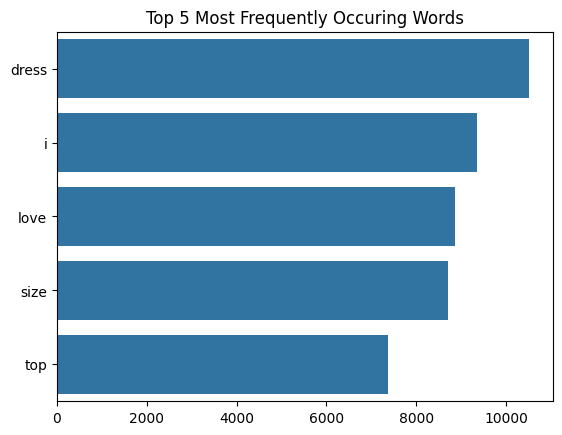

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 5 Most Frequently Occuring Words')
plt.show()

## Most Frequently occuring N_grams



For separating text into n-grams, we will use `CountVectorizer` from Sklearn

This code block creates a count vectorizer with ngram range of 2 to 2 and then applies it to the preprocessed reviews in the DataFrame to extract bigrams.

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review Text Cleaned'])

In [ ]:
cv.vocabulary_.items()

dict_items([('absolutely wonderful', 5408), ('wonderful silky', 262894), ('silky sexy', 201608), ('sexy comfortable', 194431), ('love dress', 132030), ('dress sooo', 64381), ('sooo pretty', 213203), ('pretty happened', 171673), ('happened find', 99651), ('find store', 80452), ('store glad', 217670), ('glad bc', 93077), ('bc never', 19452), ('never would', 147479), ('would ordered', 266067), ('ordered online', 155195), ('online bc', 153099), ('bc petite', 19456), ('petite bought', 163821), ('bought petite', 29417), ('petite love', 164010), ('love length', 132274), ('length hits', 121271), ('hits little', 103842), ('little knee', 126739), ('knee would', 115544), ('would definitely', 265769), ('definitely true', 57026), ('true midi', 241605), ('midi someone', 140445), ('someone truly', 212436), ('truly petite', 241776), ('high hopes', 102659), ('hopes dress', 105124), ('dress really', 64173), ('really wanted', 179531), ('wanted work', 252683), ('work initially', 263926), ('initially order

In [ ]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
ngram_freq

frequency         ngram
0            1326     true size
1             928    this dress
2             730    love dress
3             688  usually wear
4             618   looks great
...           ...           ...
270047          1        00 32c
270048          1        00 32b
270049          1         00 24
270050          1        00 115
270051          1        00 00p

[270052 rows x 2 columns]

In [ ]:
ngram_freq['frequency'].describe()

count    270052.000000
mean          2.318005
std           8.677172
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1326.000000
Name: frequency, dtype: float64

This code plot the bar chart of Top 10 Most Frequently Occuring Bigrams

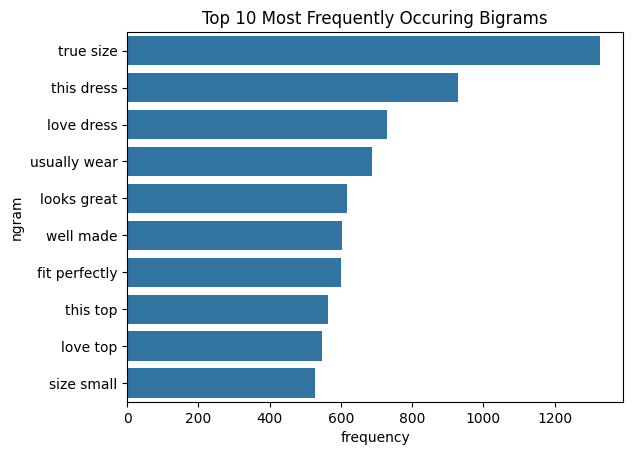

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

This code block creates a CountVectorizer object with the ngram_range parameter set to (3,3) to extract trigrams from the preprocessed reviews. It then fits and transforms the reviews using this vectorizer and counts the frequency of each trigram in the corpus. A DataFrame is then created from this count data and sorted by frequency, and the top 10 most frequently occurring trigrams are displayed using a bar plot.

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review Text Cleaned'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
ngram_freq

frequency                      ngram
0             269             fits true size
1             218              fit true size
2             165  received many compliments
3             139             runs true size
4             138             love love love
...           ...                        ...
531202          1                 00 32c cup
531203          1                 00 32b bra
531204          1                   00 24 xs
531205          1                 00 115 lbs
531206          1                  00 00p 00

[531207 rows x 2 columns]

This code plot the bar chart of Top 10 Most Frequently Occuring Trigrams

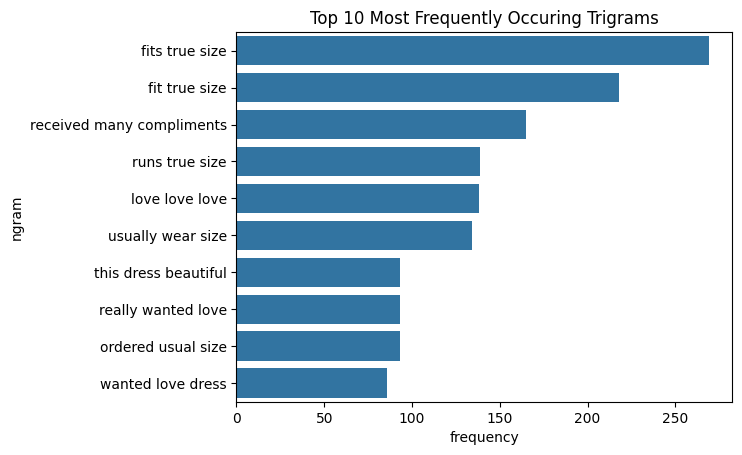

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

# Topic Modelling

From our EDA we were able to infer that the data was about reviews related to clothes,lets see if there are reviews for any other categories other then clothes.


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

In [ ]:
tfidf_matrix  = vectorizer.fit_transform(df['Review Text Cleaned'])

In [ ]:
tfidf_matrix

<22504x8066 sparse matrix of type '<class 'numpy.float64'>'
	with 590925 stored elements in Compressed Sparse Row format>

In [ ]:
nmf_model = NMF(n_components=3,random_state=42)

In [ ]:
nmf_model.fit(tfidf_matrix )

NMF(n_components=3, random_state=42)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['look', 'back', 'fabric', 'little', 'xs', 'medium', 'really', 'large', 'fit', 'ordered', 'would', 'like', 'small', 'top', 'size']


THE TOP 15 WORDS FOR TOPIC #1
['fits', 'would', 'made', 'summer', 'dresses', 'comfortable', 'slip', 'fabric', 'wear', 'perfect', 'love', 'flattering', 'beautiful', 'this', 'dress']


THE TOP 15 WORDS FOR TOPIC #2
['flattering', 'this', 'bought', 'super', 'pants', 'sweater', 'wear', 'shirt', 'color', 'perfect', 'soft', 'jeans', 'comfortable', 'great', 'love']




* We tried to get 3 different topics from our reviews but looking at the above output we can say that our reviews in the dataset is related to clothes only

# Text Classification


* Lets try to create a classification model to predict the sentiment of reviews
* From EDA we can infer that this is a very highly imbalanced dataset which shoiuld be probably be treated as outlier detection problem
* But i am trying to do a classification task
* Lets see how the model perform with this imbalanced data and how we can try to deal with data imbalance

In [ ]:
review = df[['Review Text Cleaned','sentiment']]

In [ ]:
review

Review Text Cleaned  sentiment
0            absolutely wonderful silky sexy comfortable          1
1      love dress sooo pretty happened find store gla...          1
2      i high hopes dress really wanted work initiall...          1
3      i love love love jumpsuit fun flirty fabulous ...          1
4      this shirt flattering due adjustable front tie...          1
...                                                  ...        ...
22499  i happy snag dress great price easy slip flatt...          1
22500  it reminds maternity clothes soft stretchy shi...          1
22501  this fit well top see never would worked glad ...          1
22502  i bought dress wedding summer cute unfortunate...          1
22503  this dress lovely platinum feminine fits perfe...          1

[22504 rows x 2 columns]

## Doing Train test split and using term frequency-inverse document frequency vectorizer(TfidfVectorizer) on our data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review['Review Text Cleaned'], review['sentiment'], test_size=0.2, random_state=42)

Finding total number of unique words in our data

In [ ]:
words = []
for i in df['sentence_corpus'].to_list():
  words.extend(i)

print(len(set(words)))

13980


In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  print(classification_report(y_true,y_pred))
  conf_matrix = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
  disp.plot()
  plt.show()
  return model_results

## LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
base_model1 = LinearSVC()


base_model1 = Pipeline([
                    ("tfidf", TfidfVectorizer(max_features=10000)), # convert words to numbers using tfidf
                    ("clf", LinearSVC()) # model the text
])

base_model1.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=10000)),
                ('clf', LinearSVC())])

In [ ]:
y_pred = base_model1.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.24      0.36       130
           1       0.98      1.00      0.99      4371

    accuracy                           0.98      4501
   macro avg       0.86      0.62      0.67      4501
weighted avg       0.97      0.98      0.97      4501



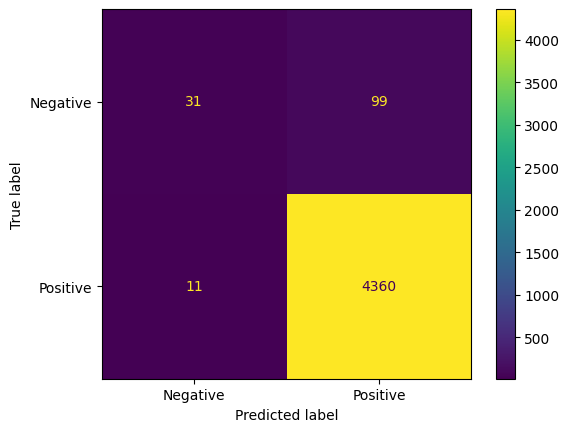

In [ ]:
baseline1_results = calculate_results(y_test, y_pred)

In [ ]:
print(baseline1_results)

{'accuracy': 97.55609864474562, 'precision': 0.9708745128311755, 'recall': 0.9755609864474561, 'f1': 0.969430925680206}


In [ ]:
def plot_roc_auc_curve(y_test, y_pred, title="ROC Curve", label="Model"):
  """
  Calculates and plots the ROC AUC curve for the given true labels (y_test) and predicted labels or probability scores (y_pred).

  Args:
    y_test: True labels for the test data.
    y_pred: Predicted labels or probability scores for the test data.
    title: Title for the plot (optional).
    label: Label for the ROC curve (optional).
  """

  # Calculate ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  # Calculate AUC score
  auc = roc_auc_score(y_test, y_pred)

  # Plot ROC curve
  plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend()
  plt.show()

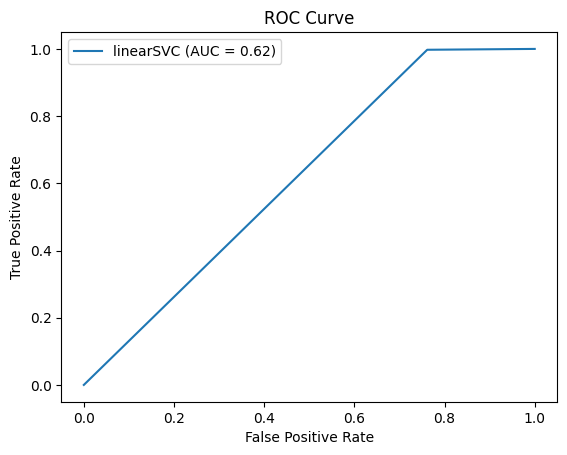

In [ ]:
plot_roc_auc_curve(y_test, y_pred, title="ROC Curve", label="linearSVC")

In [ ]:
def plot_precision_recall_curve(y_test, y_pred, pos_label=1, title="Precision-Recall Curve", label="Model"):
  """
  Calculates and plots the precision-recall curve for the given true labels (y_test) and predicted labels (y_pred).

  Args:
    y_test: True labels for the test data.
    y_pred: Predicted labels or probability scores for the test data.
    pos_label: The label considered positive (default: 1).
    title: Title for the plot (optional).
    label: Label for the precision-recall curve (optional).
    average: Averaging method for multi-class data ('macro', 'micro', 'weighted', or None).
  """

  # Calculate precision, recall, and thresholds
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label=pos_label)


  # Plot precision-recall curve
  plt.step(recall, precision, label=label)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(title)
  plt.legend()
  plt.grid(True)

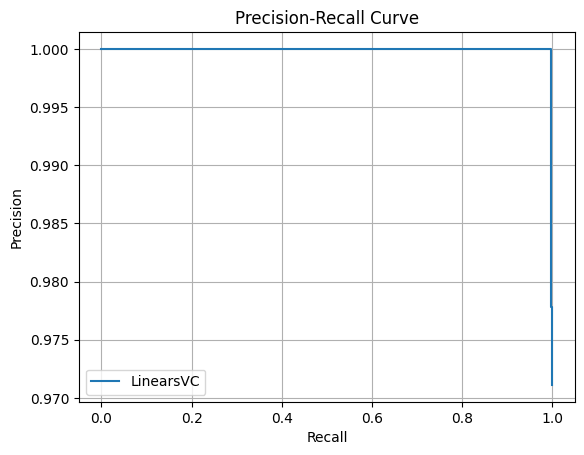

In [ ]:
plot_precision_recall_curve(y_test, y_pred, pos_label=1, title="Precision-Recall Curve", label="LinearsVC")

* We have very bad recall for 0 class, this is because of our class imbalance
* lets try using SMOTE method to deal with this problem
* lets see how much our predictions will improve

SMOTE from imblearn doesn't implement the fit and transform methods that sklearn's Pipeline expects for intermediate steps

 Therefore using imblearns pipeline

In [ ]:
from imblearn.pipeline import Pipeline as Pipe2

base_model2 = Pipe2([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('smote', SMOTE(random_state=42)),
    ('clf', LinearSVC())
])

base_model2.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=10000)),
                ('smote', SMOTE(random_state=42)), ('clf', LinearSVC())])

In [ ]:
y_pred = base_model2.predict(X_test)

              precision    recall  f1-score   support

           0       0.46      0.45      0.46       130
           1       0.98      0.98      0.98      4371

    accuracy                           0.97      4501
   macro avg       0.72      0.72      0.72      4501
weighted avg       0.97      0.97      0.97      4501



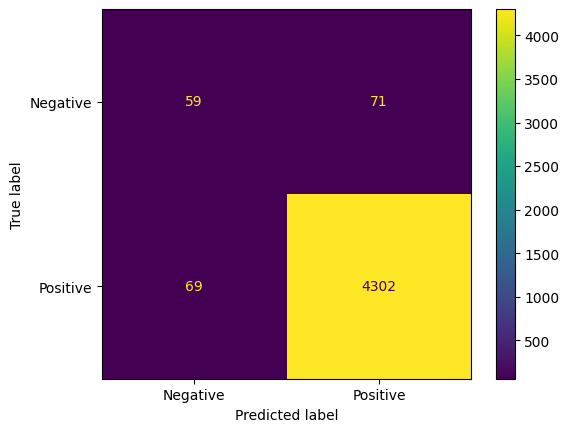

In [ ]:
baseline2_results = calculate_results(y_test, y_pred)

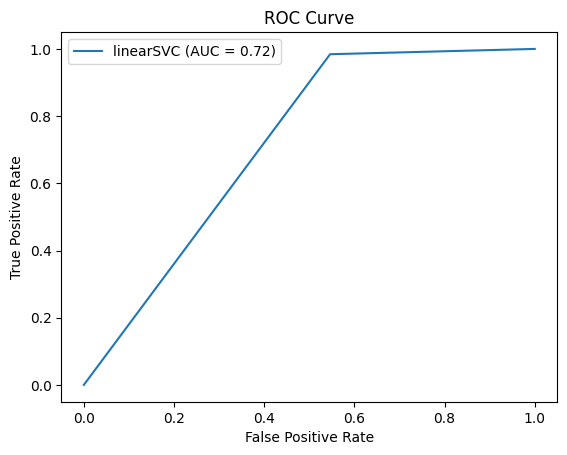

In [ ]:
plot_roc_auc_curve(y_test, y_pred, title="ROC Curve", label="linearSVC")

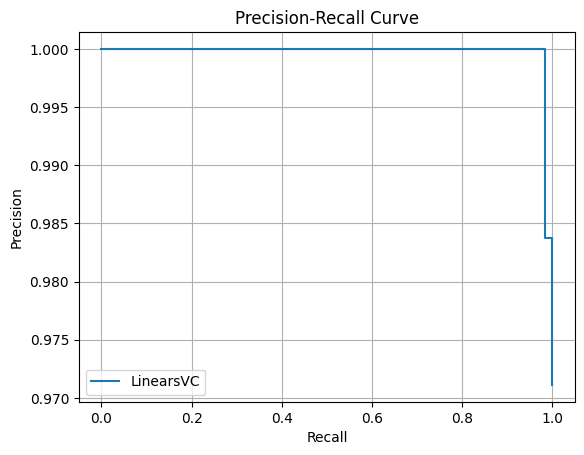

In [ ]:
plot_precision_recall_curve(y_test, y_pred, pos_label=1, title="Precision-Recall Curve", label="LinearsVC")

* After using SMOTE to handle class imbalance we have doubled our recall score for 0 class
* Thos came at a cost i.e we have a significant reduction in our precision for 0 class
* our overall f1 score for 0 class increased from 0.36 to 0.48, this is a good increase so out method to deal with class imbalance worked to an extent.

In [ ]:
baseline2_results

{'accuracy': 96.8895800933126,
 'precision': 0.9686634852226603,
 'recall': 0.968895800933126,
 'f1': 0.968778799226848}

## Deep Learning(Neural Network Models)

* We will try a lot of different models and compare them to find the best performing model
* We will also try different method of embedding and way to handle class imbalance

These are our series of experiments
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(review['Review Text Cleaned'].to_numpy(),
                                                                            review['sentiment'].to_numpy(),
                                                                            test_size=0.2, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
# Finding average number of words in a sentence
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

30

In [ ]:
text_vectorizer = layers.TextVectorization(max_tokens=10000,
                                    split="whitespace", # how to split tokens
                                    output_mode="int", # map tokens to numbers
                                    output_sequence_length=30, # how long should the output sequence of tokens be
                                    pad_to_max_tokens=True)

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim=10000, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=30, # how long is each input
                             name="embedding_1")


In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "the fabric was very nice"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[ 132,   13, 1644,  453,   30,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
i love dress sale sized sm petite added simple full slip endless compliments inquiries buy      

Vectorized version:


<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[   3,    4,    2,   97,  246, 1988,   45,  631,  434,  229,  281,
        2887,  137,    1,  161,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'dress', 'i', 'love']
Bottom 5 least common words: ['lrg', 'lovey', 'lovethis', 'lovelies', 'lovel']


In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

### **Model 1**: Feed-forward neural network (dense model)

In [ ]:
# Build model with the Functional API
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so using sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 30)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 30, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Creating class weights to deal with class imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(val_labels), y=val_labels)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              class_weight=class_weights_dict,
                              callbacks=[early_stopping_callback,create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240219-090109
Epoch 1/10
563/563 [==============================] - 17s 27ms/step - loss: 0.5968 - accuracy: 0.8682 - val_loss: 0.3650 - val_accuracy: 0.8974
Epoch 2/10
563/563 [==============================] - 4s 8ms/step - loss: 0.3218 - accuracy: 0.8914 - val_loss: 0.2381 - val_accuracy: 0.8987
Epoch 3/10
563/563 [==============================] - 4s 7ms/step - loss: 0.1825 - accuracy: 0.9249 - val_loss: 0.2346 - val_accuracy: 0.8929
Epoch 4/10
563/563 [==============================] - 4s 8ms/step - loss: 0.1208 - accuracy: 0.9463 - val_loss: 0.1468 - val_accuracy: 0.9409
Epoch 5/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0857 - accuracy: 0.9623 - val_loss: 0.1476 - val_accuracy: 0.9405
Epoch 6/10
563/563 [==============================] - 4s 6ms/step - loss: 0.0629 - accuracy: 0.9713 - val_loss: 0.1337 - val_accuracy: 0.9507
Epoch 7/10
563/563 [==============================] - 4s 8ms/step -

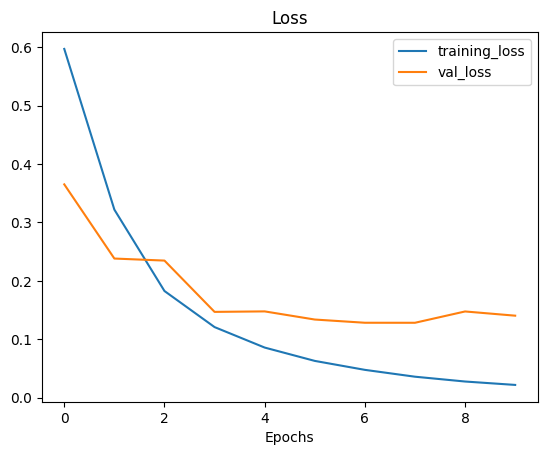

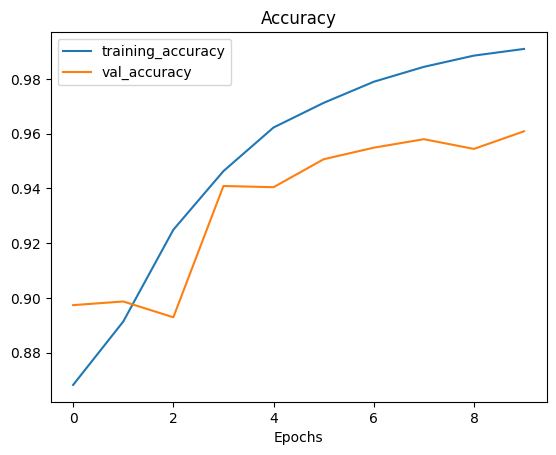

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

141/141 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9609


[0.14029110968112946, 0.9608975648880005]

In [ ]:
len(val_sentences),len(val_labels)

(4501, 4501)

In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

141/141 [==============================] - 0s 2ms/step


array([[0.9815838 ],
       [0.53556854],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.24288982],
       [0.95014805],
       [0.8015122 ],
       [0.9999999 ],
       [0.9999862 ]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)).numpy()

              precision    recall  f1-score   support

           0       0.36      0.46      0.41       130
           1       0.98      0.98      0.98      4371

    accuracy                           0.96      4501
   macro avg       0.67      0.72      0.69      4501
weighted avg       0.97      0.96      0.96      4501



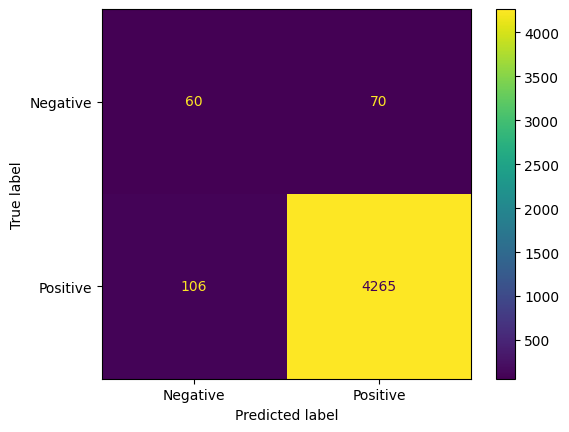

{'accuracy': 96.08975783159298,
 'precision': 0.9658757247119165,
 'recall': 0.9608975783159298,
 'f1': 0.9631945824768279}

In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

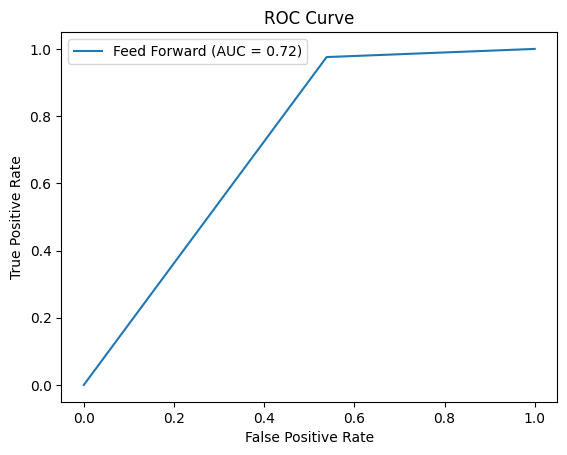

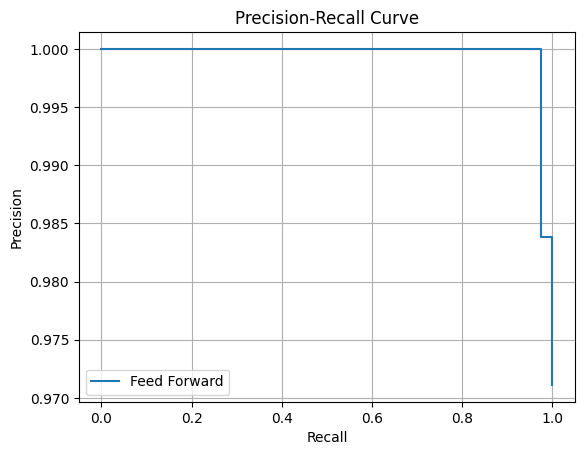

In [ ]:
plot_roc_auc_curve(y_test=val_labels, y_pred=model_1_preds, title="ROC Curve", label="Feed Forward")
plot_precision_recall_curve(y_test=val_labels, y_pred=model_1_preds, pos_label=1, title="Precision-Recall Curve", label="Feed Forward")

* We were able to increace our recall score for class zero to 0.56
* our precision and f1 score for class 0 has decreased
* Our predictions for class 1 are extraordinary throughout all the metrics

### **Model 2**: LSTM model


In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
model_2_embedding = layers.Embedding(input_dim=10000, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=30, # how long is each input
                             name="embedding_2")

In [ ]:
# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 30)                0         
 ctorization)                                                    
                                                                 
 embedding_2 (Embedding)     (None, 30, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              class_weight=class_weights_dict,
                              callbacks=[early_stopping_callback,create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240219-090236
Epoch 1/10
563/563 [==============================] - 19s 29ms/step - loss: 0.5670 - accuracy: 0.7014 - val_loss: 0.4355 - val_accuracy: 0.7681
Epoch 2/10
563/563 [==============================] - 6s 11ms/step - loss: 0.3009 - accuracy: 0.8783 - val_loss: 0.3919 - val_accuracy: 0.8416
Epoch 3/10
563/563 [==============================] - 5s 9ms/step - loss: 0.1544 - accuracy: 0.9459 - val_loss: 0.1521 - val_accuracy: 0.9458
Epoch 4/10
563/563 [==============================] - 5s 10ms/step - loss: 0.1145 - accuracy: 0.9655 - val_loss: 0.1764 - val_accuracy: 0.9442
Epoch 5/10
563/563 [==============================] - 5s 9ms/step - loss: 0.0751 - accuracy: 0.9747 - val_loss: 0.1300 - val_accuracy: 0.9620
Epoch 6/10
563/563 [==============================] - 5s 8ms/step - loss: 0.0616 - accuracy: 0.9800 - val_loss: 0.1291 - val_accuracy: 0.9633
Epoch 7/10
563/563 [==============================] - 5s 10ms/step - loss: 0.03

In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

141/141 [==============================] - 1s 3ms/step


((4501, 1),
 array([[0.9903088 ],
        [0.9819766 ],
        [0.99579006],
        [0.9971054 ],
        [0.99710613],
        [0.06345464],
        [0.9886855 ],
        [0.98025537],
        [0.99745804],
        [0.9948467 ]], dtype=float32))

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)>

              precision    recall  f1-score   support

           0       0.37      0.37      0.37       130
           1       0.98      0.98      0.98      4371

    accuracy                           0.96      4501
   macro avg       0.67      0.68      0.67      4501
weighted avg       0.96      0.96      0.96      4501



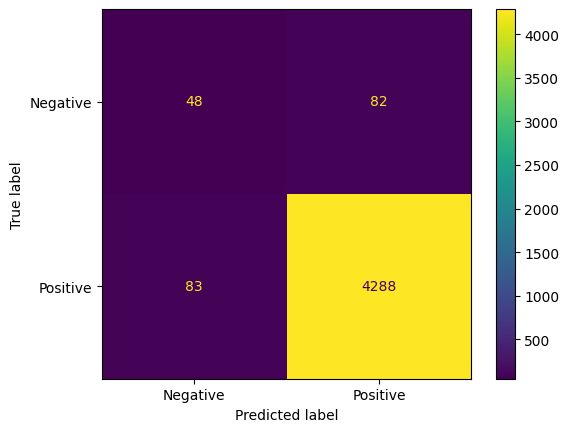

{'accuracy': 96.33414796711843,
 'precision': 0.9634780767572095,
 'recall': 0.9633414796711842,
 'f1': 0.9634096097921906}

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

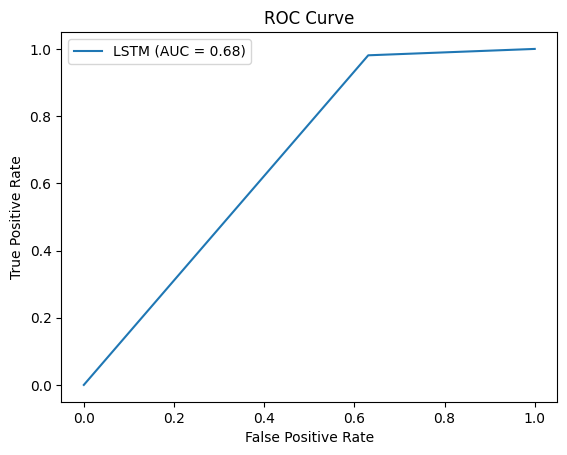

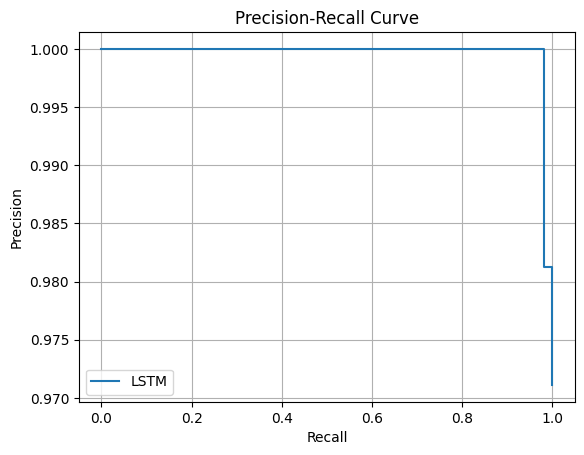

In [ ]:
plot_roc_auc_curve(y_test=val_labels, y_pred=model_2_preds, title="ROC Curve", label="LSTM")
plot_precision_recall_curve(y_test=val_labels, y_pred=model_2_preds, pos_label=1, title="Precision-Recall Curve", label="LSTM")

* Our model 2 performance is slightly lesser than our baseline model

### **Model 3**: GRU model

In [ ]:
model_3_embedding = layers.Embedding(input_dim=10000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=30,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 30)                0         
 ctorization)                                                    
                                                                 
 embedding_3 (Embedding)     (None, 30, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              class_weight=class_weights_dict,
                              callbacks=[early_stopping_callback,create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240219-090403
Epoch 1/10
563/563 [==============================] - 18s 28ms/step - loss: 0.6026 - accuracy: 0.7013 - val_loss: 0.4009 - val_accuracy: 0.8627
Epoch 2/10
563/563 [==============================] - 6s 11ms/step - loss: 0.3322 - accuracy: 0.8616 - val_loss: 0.3395 - val_accuracy: 0.8620
Epoch 3/10
563/563 [==============================] - 5s 8ms/step - loss: 0.1554 - accuracy: 0.9446 - val_loss: 0.1867 - val_accuracy: 0.9342
Epoch 4/10
563/563 [==============================] - 6s 10ms/step - loss: 0.0779 - accuracy: 0.9762 - val_loss: 0.1519 - val_accuracy: 0.9547
Epoch 5/10
563/563 [==============================] - 5s 8ms/step - loss: 0.0449 - accuracy: 0.9853 - val_loss: 0.1187 - val_accuracy: 0.9685
Epoch 6/10
563/563 [==============================] - 5s 8ms/step - loss: 0.0287 - accuracy: 0.9887 - val_loss: 0.1488 - val_accuracy: 0.9662
Epoch 7/10
563/563 [==============================] - 5s 9ms/step - loss: 0.0269

In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

141/141 [==============================] - 1s 3ms/step


((4501, 1),
 array([[0.9929355 ],
        [0.99141425],
        [0.9986284 ],
        [0.9995764 ],
        [0.99890494],
        [0.01958041],
        [0.9906035 ],
        [0.9716607 ],
        [0.9992016 ],
        [0.998801  ]], dtype=float32))

In [ ]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)>

              precision    recall  f1-score   support

           0       0.44      0.35      0.39       130
           1       0.98      0.99      0.98      4371

    accuracy                           0.97      4501
   macro avg       0.71      0.67      0.69      4501
weighted avg       0.97      0.97      0.97      4501



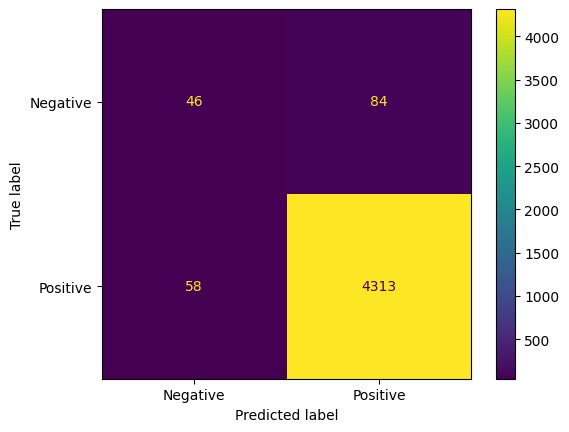

{'accuracy': 96.84514552321706,
 'precision': 0.9653403026654124,
 'recall': 0.9684514552321706,
 'f1': 0.9667455341995733}

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

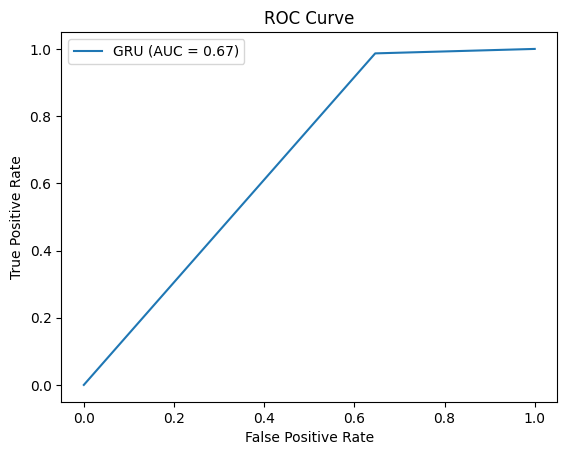

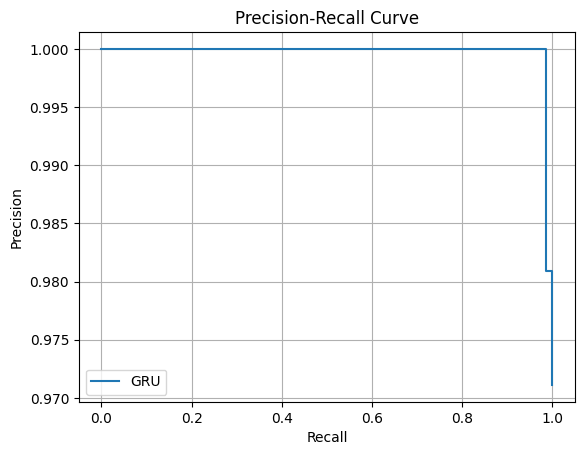

In [ ]:
plot_roc_auc_curve(y_test=val_labels, y_pred=model_3_preds, title="ROC Curve", label="GRU")
plot_precision_recall_curve(y_test=val_labels, y_pred=model_3_preds, pos_label=1, title="Precision-Recall Curve", label="GRU")

* Our model 3 performance is lower than our baseline model

### **Model 4**: Bidirectional-LSTM model

In [ ]:
model_4_embedding = layers.Embedding(input_dim=10000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=30,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 30)                0         
 ctorization)                                                    
                                                                 
 embedding_4 (Embedding)     (None, 30, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              class_weight=class_weights_dict,
                              callbacks=[early_stopping_callback,create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240219-090459
Epoch 1/10
563/563 [==============================] - 21s 31ms/step - loss: 0.5158 - accuracy: 0.7911 - val_loss: 0.3093 - val_accuracy: 0.8745
Epoch 2/10
563/563 [==============================] - 7s 13ms/step - loss: 0.2313 - accuracy: 0.8996 - val_loss: 0.2566 - val_accuracy: 0.8962
Epoch 3/10
563/563 [==============================] - 6s 11ms/step - loss: 0.1092 - accuracy: 0.9566 - val_loss: 0.1815 - val_accuracy: 0.9378
Epoch 4/10
563/563 [==============================] - 7s 12ms/step - loss: 0.0677 - accuracy: 0.9749 - val_loss: 0.1162 - val_accuracy: 0.9609
Epoch 5/10
563/563 [==============================] - 7s 12ms/step - loss: 0.0552 - accuracy: 0.9788 - val_loss: 0.1133 - val_accuracy: 0.9638
Epoch 6/10
563/563 [==============================] - 6s 11ms/step - loss: 0.0389 - accuracy: 0.9854 - val_loss: 0.1178 - val_accuracy: 0.9633
Epoch 7/10
563/563 [==============================] - 7s 12ms/s

In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

141/141 [==============================] - 1s 4ms/step


array([[0.99558604],
       [0.5323278 ],
       [0.99960524],
       [0.9979983 ],
       [0.99665123],
       [0.26820317],
       [0.97208077],
       [0.87252516],
       [0.9993857 ],
       [0.99912363]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)>

              precision    recall  f1-score   support

           0       0.39      0.46      0.42       130
           1       0.98      0.98      0.98      4371

    accuracy                           0.96      4501
   macro avg       0.69      0.72      0.70      4501
weighted avg       0.97      0.96      0.97      4501



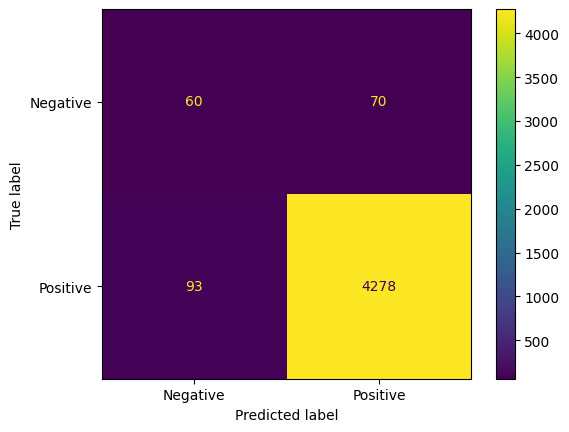

{'accuracy': 96.37858253721396,
 'precision': 0.9668096216325861,
 'recall': 0.9637858253721395,
 'f1': 0.9652096611109721}

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

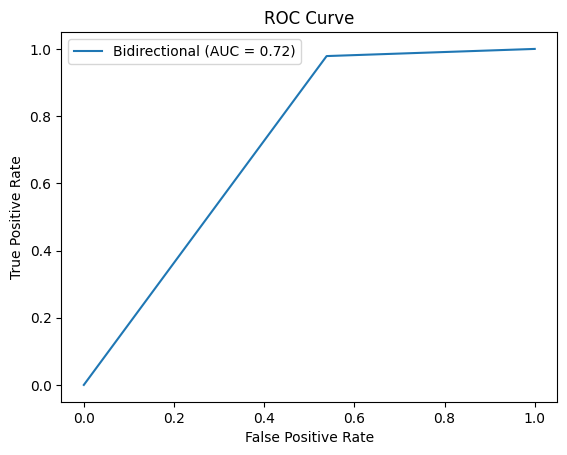

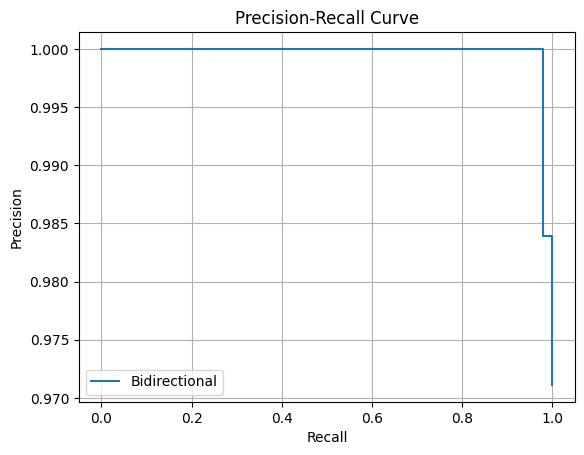

In [ ]:
plot_roc_auc_curve(y_test=val_labels, y_pred=model_4_preds, title="ROC Curve", label="Bidirectional")
plot_precision_recall_curve(y_test=val_labels, y_pred=model_4_preds, pos_label=1, title="Precision-Recall Curve", label="Bidirectional")

* Our model 4 performance is lower than our baseline model

### **Model 5**: 1D Convolutional Neural Network

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
model_5_embedding = layers.Embedding(input_dim=10000,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=30,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 30)                0         
 ctorization)                                                    
                                                                 
 embedding_5 (Embedding)     (None, 30, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 26, 32)            20512     
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              class_weight=class_weights_dict,
                              callbacks=[early_stopping_callback, create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240219-090608
Epoch 1/10
563/563 [==============================] - 18s 28ms/step - loss: 0.5050 - accuracy: 0.8564 - val_loss: 0.3734 - val_accuracy: 0.8314
Epoch 2/10
563/563 [==============================] - 5s 8ms/step - loss: 0.1819 - accuracy: 0.9308 - val_loss: 0.2212 - val_accuracy: 0.9067
Epoch 3/10
563/563 [==============================] - 5s 9ms/step - loss: 0.0564 - accuracy: 0.9763 - val_loss: 0.1193 - val_accuracy: 0.9571
Epoch 4/10
563/563 [==============================] - 4s 8ms/step - loss: 0.0219 - accuracy: 0.9911 - val_loss: 0.1089 - val_accuracy: 0.9660
Epoch 5/10
563/563 [==============================] - 4s 7ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.1152 - val_accuracy: 0.9682
Epoch 6/10
563/563 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.1231 - val_accuracy: 0.9682
Epoch 7/10
563/563 [==============================] - 4s 7ms/step - loss: 0.002

In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

141/141 [==============================] - 0s 2ms/step


array([[0.99338734],
       [0.99741745],
       [0.9999956 ],
       [0.99999976],
       [0.9999999 ],
       [0.61324906],
       [0.98397714],
       [0.99175245],
       [0.99989986],
       [0.99995434]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       130
           1       0.98      0.98      0.98      4371

    accuracy                           0.97      4501
   macro avg       0.70      0.72      0.71      4501
weighted avg       0.97      0.97      0.97      4501



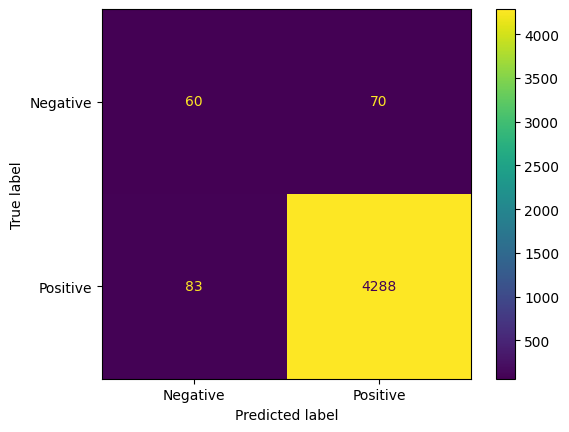

{'accuracy': 96.60075538769163,
 'precision': 0.967637556801619,
 'recall': 0.9660075538769163,
 'f1': 0.9667915855513477}

In [ ]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

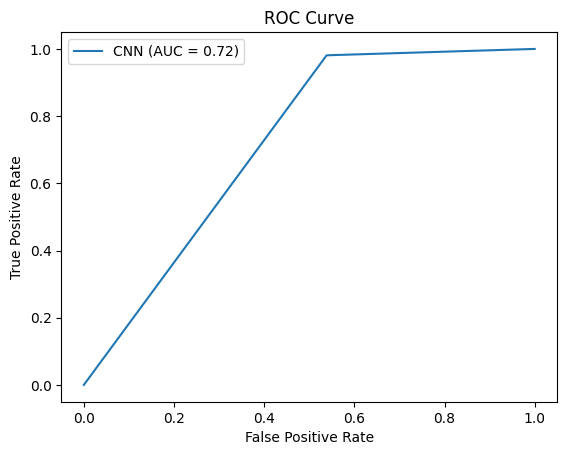

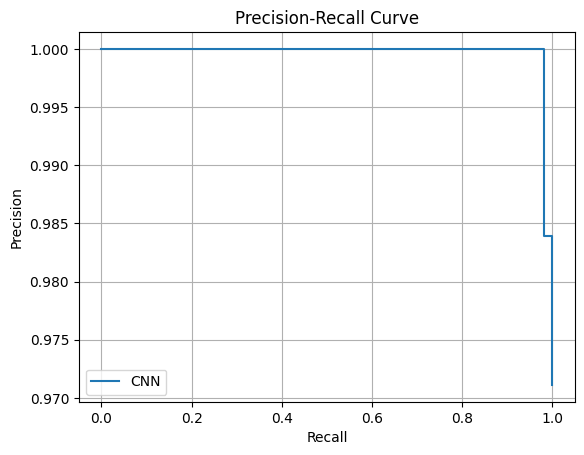

In [ ]:
plot_roc_auc_curve(y_test=val_labels, y_pred=model_5_preds, title="ROC Curve", label="CNN")
plot_precision_recall_curve(y_test=val_labels, y_pred=model_5_preds, pos_label=1, title="Precision-Recall Curve", label="CNN")

* Model 5 performance is lesser than baseline model

### Model 6: TensorFlow Hub Pretrained Feature Extractor

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.0383079   0.07060568 -0.00544923 -0.02876866  0.09332053 -0.02719158
 -0.04129208 -0.00526121  0.04404865  0.02649204 -0.02041247  0.02542662
 -0.03808369  0.0111632   0.02619196  0.05878328  0.05332297 -0.05135018
  0.03534562 -0.0572991  -0.04671454  0.07310572  0.04318308 -0.03791042
 -0.00928874  0.03207073  0.03482649  0.03635859 -0.00286626 -0.00311324
  0.10560168  0.01607183 -0.0684387  -0.04913788 -0.01651672  0.03794821
 -0.03028685  0.04226158  0.04323564 -0.0204733   0.06643599 -0.06190886
  0.06471875  0.01081628 -0.06696087  0.02333561  0.01237055  0.04628363
 -0.01833745  0.0264784 ], shape=(50,), dtype=float32)


In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels),
                              class_weight=class_weights_dict,
                              callbacks=[early_stopping_callback, create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240219-090726
Epoch 1/10
563/563 [==============================] - 16s 23ms/step - loss: 0.4328 - accuracy: 0.8451 - val_loss: 0.3248 - val_accuracy: 0.8598
Epoch 2/10
563/563 [==============================] - 10s 18ms/step - loss: 0.3056 - accuracy: 0.8621 - val_loss: 0.2986 - val_accuracy: 0.8674
Epoch 3/10
563/563 [==============================] - 9s 16ms/step - loss: 0.2763 - accuracy: 0.8709 - val_loss: 0.3078 - val_accuracy: 0.8627
Epoch 4/10
563/563 [==============================] - 9s 17ms/step - loss: 0.2686 - accuracy: 0.8727 - val_loss: 0.2911 - val_accuracy: 0.8694
Epoch 5/10
563/563 [==============================] - 11s 19ms/step - loss: 0.2569 - accuracy: 0.8754 - val_loss: 0.2580 - val_accuracy: 0.8831
Epoch 6/10
563/563 [==============================] - 10s 18ms/step - loss: 0.2457 - accuracy: 0.8765 - val_loss: 0.2191 - val_accuracy: 0.9005
Epoch 7/10
563/563 [==============================] - 

In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

141/141 [==============================] - 2s 10ms/step


array([[0.9786073 ],
       [0.24928305],
       [0.9998988 ],
       [0.83117026],
       [0.99834526],
       [0.03888528],
       [0.9909055 ],
       [0.24952231],
       [0.9882853 ],
       [0.9962676 ]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 1., 0., 1., 0., 1., 1.], dtype=float32)>

              precision    recall  f1-score   support

           0       0.18      0.86      0.30       130
           1       1.00      0.89      0.94      4371

    accuracy                           0.88      4501
   macro avg       0.59      0.87      0.62      4501
weighted avg       0.97      0.88      0.92      4501



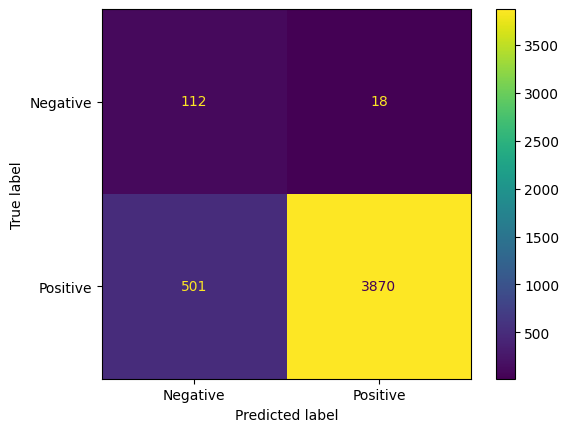

{'accuracy': 88.46922906020885,
 'precision': 0.9718986731927575,
 'recall': 0.8846922906020884,
 'f1': 0.9187994830390156}

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

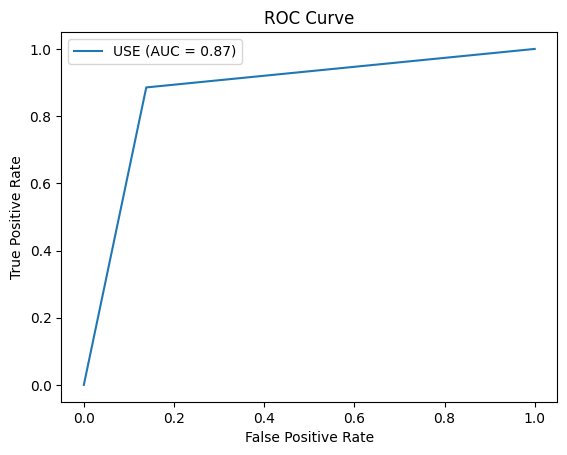

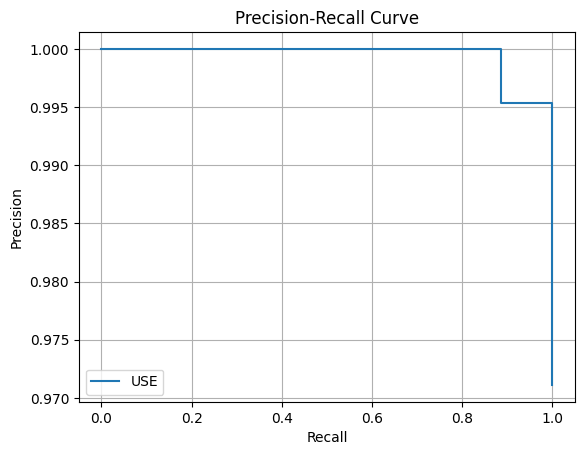

In [ ]:
plot_roc_auc_curve(y_test=val_labels, y_pred=model_6_preds, title="ROC Curve", label="USE")
plot_precision_recall_curve(y_test=val_labels, y_pred=model_6_preds, pos_label=1, title="Precision-Recall Curve", label="USE")

* our overall model performance is lesser than baseline model
* We got the highest recall of 0.85 in this model

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

24274472/24274472 [==============================] - 0s 0us/step


In [ ]:
base_model

In [ ]:
base_model.trainable = False

In [ ]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name,layer.trainable)

0 input_6 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline2_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

accuracy  precision    recall        f1
baseline                 96.889580   0.968663  0.968896  0.968779
simple_dense             96.089758   0.965876  0.960898  0.963195
lstm                     96.334148   0.963478  0.963341  0.963410
gru                      96.845146   0.965340  0.968451  0.966746
bidirectional            96.378583   0.966810  0.963786  0.965210
conv1d                   96.600755   0.967638  0.966008  0.966792
tf_hub_sentence_encoder  88.469229   0.971899  0.884692  0.918799

In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

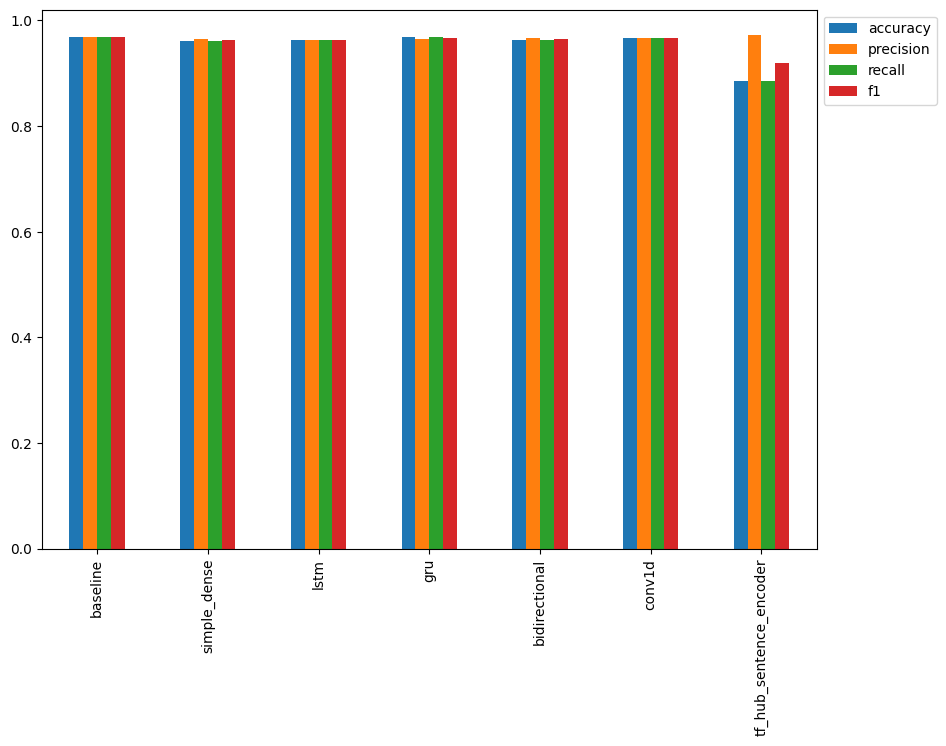

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

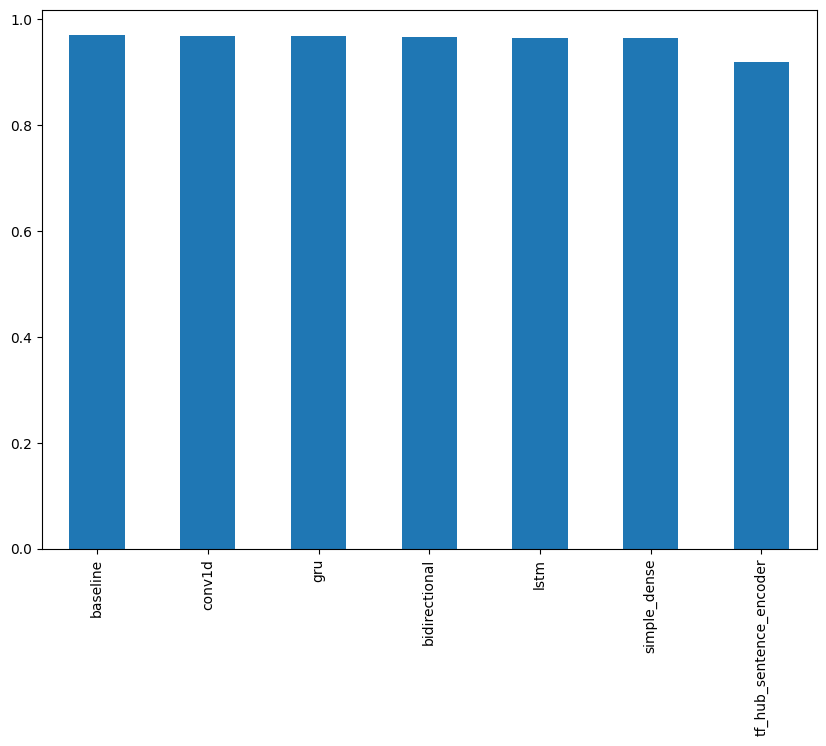

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
# Get mean pred probs for 3 models
combined_pred_probs =  tf.squeeze(model_1_pred_probs, axis=1) + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_3_pred_probs, axis=1) +  tf.squeeze(model_4_pred_probs, axis=1) +  tf.squeeze(model_5_pred_probs, axis=1)+ tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/6) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)>

              precision    recall  f1-score   support

           0       0.46      0.45      0.46       130
           1       0.98      0.98      0.98      4371

    accuracy                           0.97      4501
   macro avg       0.72      0.72      0.72      4501
weighted avg       0.97      0.97      0.97      4501



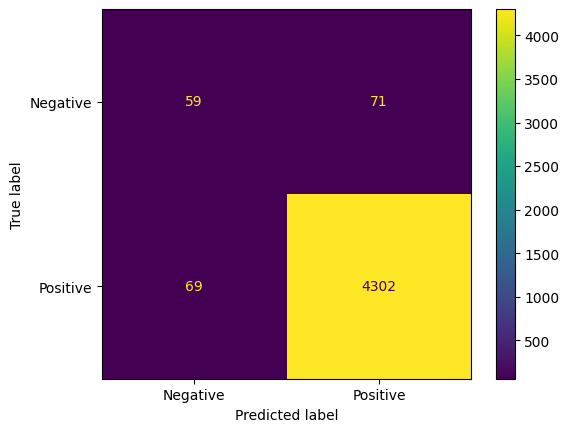

{'accuracy': 96.8895800933126,
 'precision': 0.9686634852226603,
 'recall': 0.968895800933126,
 'f1': 0.968778799226848}

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

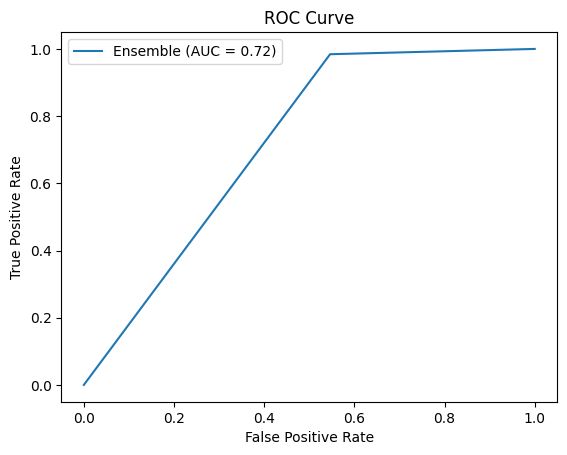

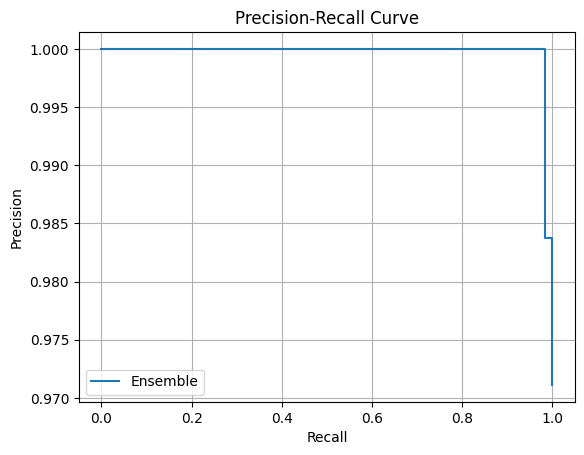

In [ ]:
plot_roc_auc_curve(y_test=val_labels, y_pred=combined_preds, title="ROC Curve", label="Ensemble")
plot_precision_recall_curve(y_test=val_labels, y_pred=combined_preds, pos_label=1, title="Precision-Recall Curve", label="Ensemble")

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [ ]:
all_model_results

accuracy  precision    recall        f1
baseline                 0.968896   0.968663  0.968896  0.968779
simple_dense             0.960898   0.965876  0.960898  0.963195
lstm                     0.963341   0.963478  0.963341  0.963410
gru                      0.968451   0.965340  0.968451  0.966746
bidirectional            0.963786   0.966810  0.963786  0.965210
conv1d                   0.966008   0.967638  0.966008  0.966792
tf_hub_sentence_encoder  0.884692   0.971899  0.884692  0.918799
ensemble_results         0.968896   0.968663  0.968896  0.968779

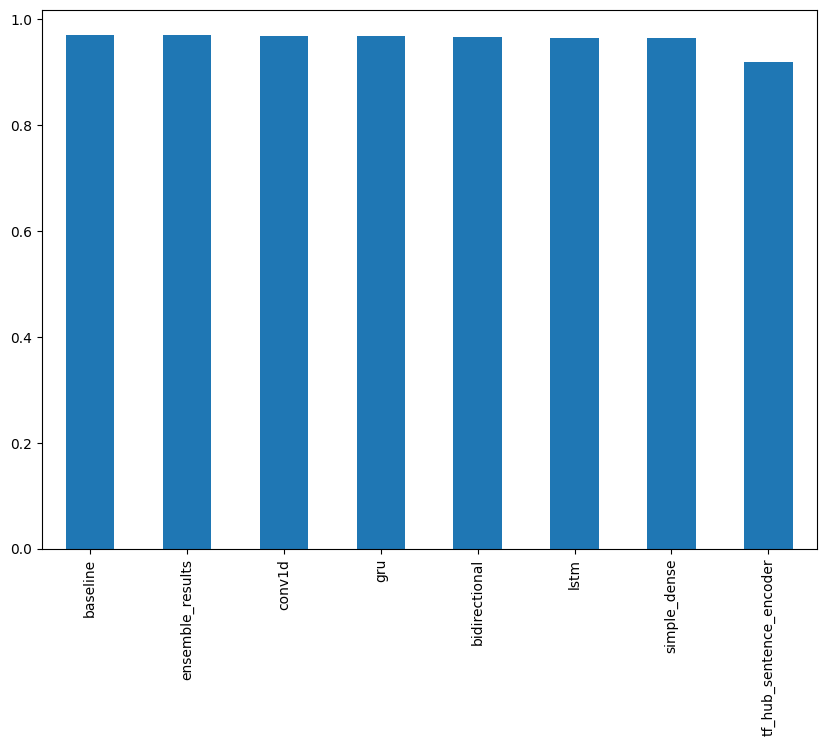

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

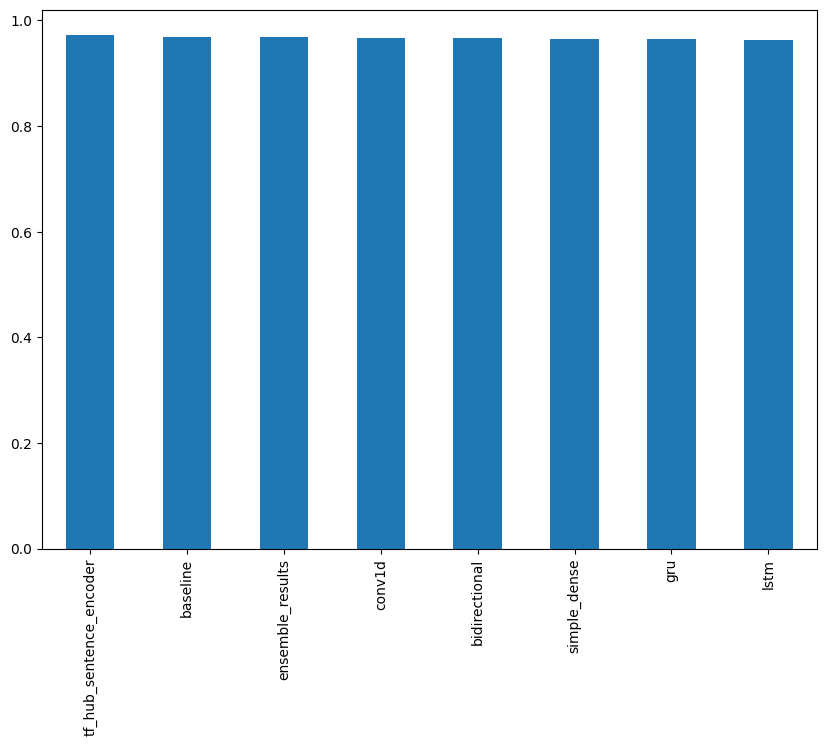

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("precision", ascending=False)["precision"].plot(kind="bar", figsize=(10, 7));

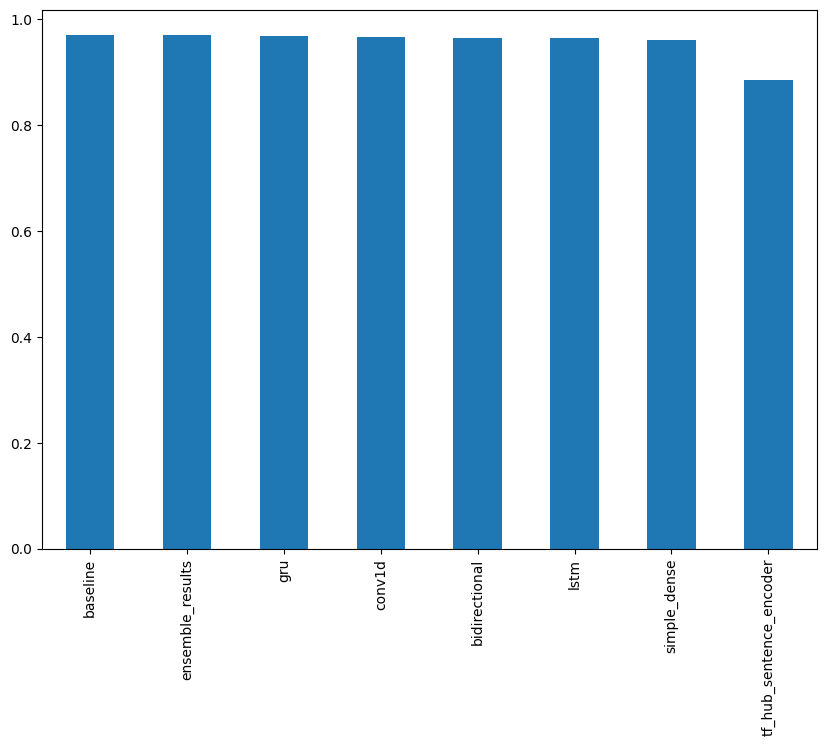

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("recall", ascending=False)["recall"].plot(kind="bar", figsize=(10, 7));

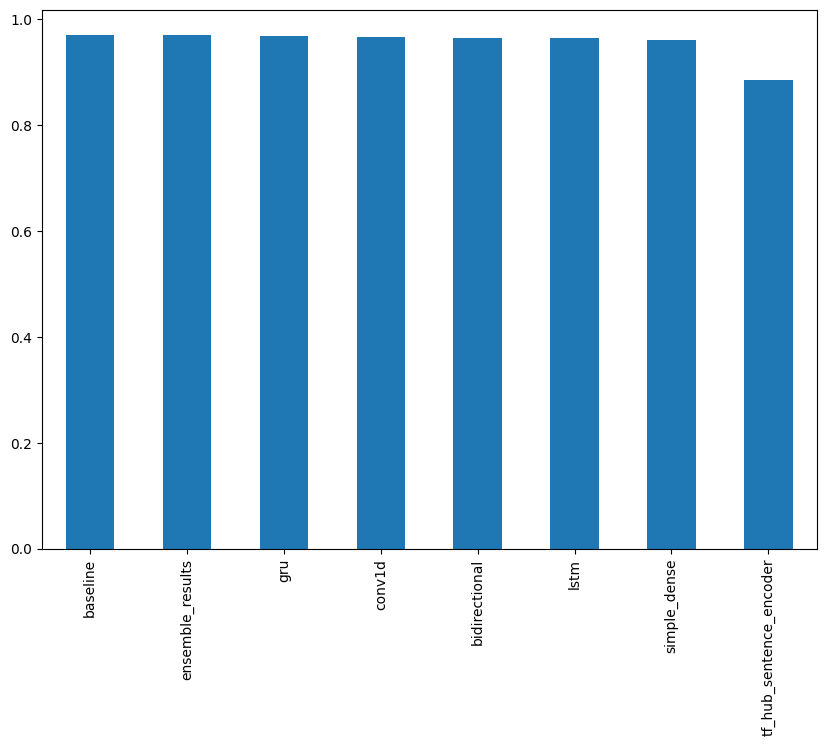

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("accuracy", ascending=False)["accuracy"].plot(kind="bar", figsize=(10, 7));

# Finding the most wrong examples

* Many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

* One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

* I am comparing our deep learning models

* Our lstm model gave us consistent results for all metrics so i am using that

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_2_preds,
                       "pred_prob": tf.squeeze(model_2_pred_probs)})
val_df.head()

text  target  pred  pred_prob
0  i loved dress much got two colors colors match...       1   1.0   0.990309
1  soft fitted without tight flattering neckline ...       1   1.0   0.981977
2  such great shirt loved fit feels paired grey j...       1   1.0   0.995790
3  first love dress love anything throw monday re...       1   1.0   0.997105
4  my husband rarely seems pleased always likes s...       1   1.0   0.997106

* Now let's find our model's wrong predictions (where target != pred) and sort them by their prediction probability (the pred_prob column).

In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

text  target  pred  \
841   these pants nothing short amazing great wide l...       0   1.0   
1670  i size body type broad padded back wide rib ca...       0   1.0   
711   i saw dress immediately drawn pictures others ...       0   1.0   
2691  i almost bought skirt yesterday store decided ...       0   1.0   
1841  i really wished heeded reviews dress ridiculou...       0   1.0   
2713  wanted jumpsuit look stupid 50 year old ordere...       0   1.0   
705   i purchased black reviews lace detail little s...       0   1.0   
3997  the sweater warm looks okay best bad high expe...       0   1.0   
2939  i lot misses retailer lately loved dress since...       0   1.0   
3509  got sale black red worn black quality poor see...       0   1.0   

      pred_prob  
841    0.998766  
1670   0.996655  
711    0.995983  
2691   0.995819  
1841   0.995170  
2713   0.994474  
705    0.994278  
3997   0.994083  
2939   0.993225  
3509   0.992927

we can write some code to visualize the sample text, truth label, prediction class and prediction probability. Because we've sorted our samples by prediction probability, viewing samples from the head of our most_wrong DataFrame will show us false positives.

In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for i,row in enumerate(most_wrong[:10].itertuples()): # loop through the top 10 rows
  _, text, target, pred, prob = row
  print(f'Sample {i}')
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Sample 0
Target: 0, Pred: 1, Prob: 0.9987659454345703
Text:
these pants nothing short amazing great wide leg plenty beautiful flow 6 months pregnant wear bump means maternity pants gained 8 lbs nice silky material great hot summer weather great comfortable travel pants downfall length 5 6 long legs get 2 3 inches chopped

----

Sample 1
Target: 0, Pred: 1, Prob: 0.9966545104980469
Text:
i size body type broad padded back wide rib cage narrow hips small bum however fits little odd back darts start waist supposed curve behind settle high wrinkle waist also high shoulders bit tight confused bought exact size pieced brocade colorful version dress one actually fits spot feeling go store

----

Sample 2
Target: 0, Pred: 1, Prob: 0.9959832429885864
Text:
i saw dress immediately drawn pictures others posted wearing made want knew color said ivory ordered prepared yellow liner slip honestly pale yellow made whole thing look dingy disappointed dress white would kept sadly return 5 1 around 135 l

* In the few samples above there something positive and negative about the purchase in the review.
* Maybe that is why our model is getting confused.
* There are some wrong labels also
* To deal with this we can prepare data with 3 emotions i.e positive,neutral and negative, and then train a model on this data, This could be one solution.  

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for i,row in enumerate(most_wrong[-10:].itertuples()): # loop through the top 10 rows
  _, text, target, pred, prob = row
  print(f'Sample {i}')
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Sample 0
Target: 1, Pred: 0, Prob: 0.005751786753535271
Text:
i like fabric soft little less orange looking photo usually size 12 14 size l small lose little weight look normal also bit annoying undo little buttons bodice get going bathroom otherwise looks cute even pockets

----

Sample 1
Target: 1, Pred: 0, Prob: 0.005054868292063475
Text:
this hoodie thin see right returned

----

Sample 2
Target: 1, Pred: 0, Prob: 0.004607765004038811
Text:
the front back materials differ back shirt soft thin front embroidery stiff imagine soften wash pretty shirt though

----

Sample 3
Target: 1, Pred: 0, Prob: 0.004306599497795105
Text:
the cowl cuffs dress thick heavy sweater material dress extremely thin non belted pictures show much volume dress enormous normal size

----

Sample 4
Target: 1, Pred: 0, Prob: 0.003754005068913102
Text:
the top received large really long length pockets front along seam lots volume back without princess seams give shape matched returned

----

Sample 5
Target: 1, 

* We have the same issues as we has for false positives in here too

* Predicting random reviews
* I will take some random reviews from amazon and test it on our best performing model

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
text = 'Perfect fit! Comfortable like a second layer of skin.'
predict_on_sentence(model_2, text)

1/1 [==============================] - 0s 126ms/step
Pred: 1.0 (positive) Prob: 0.9944985508918762
Text:
Perfect fit! Comfortable like a second layer of skin.


In [ ]:
text = [' the stitching started ripping after the first wear and did not have any pockets.', 'Quality is not bad for this price. Fitting is perfect. Comfortable to wear.', ' I received a defective product. The stitching was totally off and the length of each leg varies.']

for i in text:
  predict_on_sentence(model_2, i)

1/1 [==============================] - 0s 31ms/step
Pred: 0.0 (negative) Prob: 0.004022011999040842
Text:
 the stitching started ripping after the first wear and did not have any pockets.
1/1 [==============================] - 0s 31ms/step
Pred: 1.0 (positive) Prob: 0.8296467661857605
Text:
Quality is not bad for this price. Fitting is perfect. Comfortable to wear.
1/1 [==============================] - 0s 30ms/step
Pred: 0.0 (negative) Prob: 0.014918467961251736
Text:
 I received a defective product. The stitching was totally off and the length of each leg varies.


* In the output of the above cell 2 out of 3 predictions are correct

# Checking The speed/score tradeoff

One of the final tests we're going to do is to find the speed/score tradeoffs between our best model and baseline model.

Why is this important?

Although it can be tempting to just choose the best performing model you find through experimentation, this model might not actually work in a production setting.

Put it this way, imagine you're Twitter and receive 1 million Tweets per hour (this is a made up number, the actual number could be much higher). And you're trying to build a diaster detection system to read Tweets and alert authorities with details about a diaster in close to real-time.

Compute power isn't free so you're limited to a single compute machine for the project. On that machine, one of your models makes 10,000 predictions per second at 80% accuracy where as another one of your models (a larger model) makes 100 predictions per second at 85% accuracy.

Which model do you choose?

Is the second model's performance boost worth missing out on the extra capacity?

Of course, there are many options you could try here, such as sending as many Tweets as possible to the first model and then sending the ones which the model is least certain of to the second model.

The point here is to illustrate the best model you find through experimentation, might not be the model you end up using in production.

To make this more concrete, let's write a function to take a model and a number of samples and time how long the given model takes to make predictions on those samples.

In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find average prediction time per sample
  return total_time, time_per_pred

Now let's use our pred_timer() function to evaluate the prediction times of our best performing model (model_2) and our baseline model (model_0).

In [ ]:
def pred_timer_ensemble(sample):
  """
  Times how long a model takes to make predictions on samples for ensemble of models.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter()
  model_1_pred_probs = model_1.predict(sample)
  model_2_pred_probs = model_2.predict(sample)
  model_3_pred_probs = model_3.predict(sample)
  model_4_pred_probs = model_4.predict(sample)
  model_5_pred_probs = model_5.predict(sample)
  model_6_pred_probs = model_6.predict(sample)
  combined_pred_probs =  tf.squeeze(model_1_pred_probs, axis=1) + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_3_pred_probs, axis=1) +  tf.squeeze(model_4_pred_probs, axis=1) +  tf.squeeze(model_5_pred_probs, axis=1)+ tf.squeeze(model_6_pred_probs)
  combined_preds = tf.round(combined_pred_probs/6)
  end_time = time.perf_counter()
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(sample) # find average prediction time per sample
  return total_time, time_per_pred


In [ ]:
# Calculate model 2 prediction times
ensemble_pred_time, ensemble_time_per_pred = pred_timer_ensemble(val_sentences)
ensemble_pred_time, ensemble_time_per_pred

141/141 [==============================] - 2s 15ms/step


(6.893813528999999, 0.0015316182023994665)

In [ ]:
# Calculate baseline model 2 prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(base_model2, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.11436792500001047, 2.540944790046889e-05)

In [ ]:
np.round(ensemble_pred_time/baseline_total_pred_time)

60.0

It seems with our current hardware (in my case, I'm using a Google Colab notebook) our best performing model takes over 60x the time to make predictions as our baseline model.

Is that extra prediction time worth it?

Let's compare time per prediction versus our model's F1-scores.

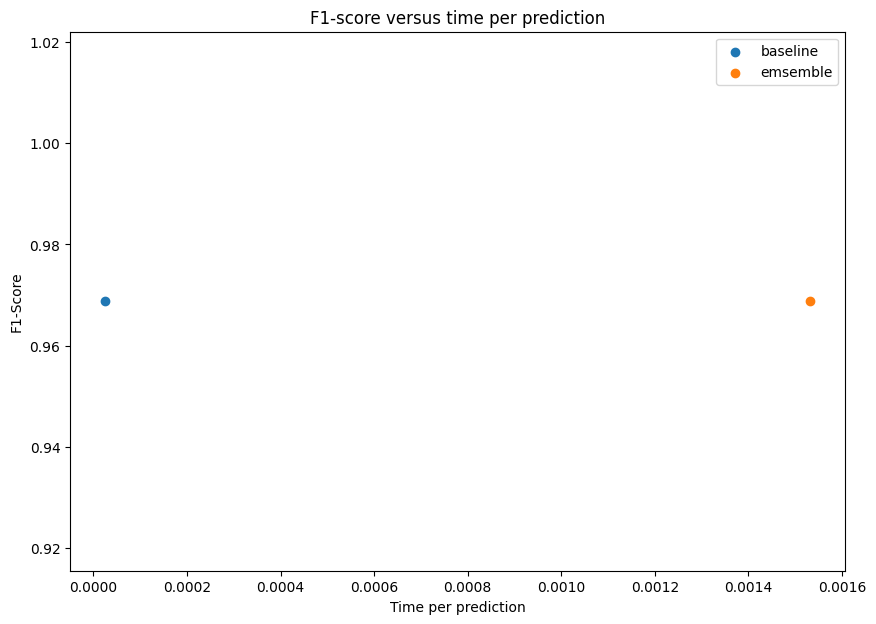

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline2_results["f1"], label="baseline")
plt.scatter(ensemble_time_per_pred, ensemble_results["f1"], label="emsemble")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

In [ ]:
# View tensorboard logs of transfer learning modelling experiments
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "Deep model on text data" \
  --description "Comparing Different models" \
  --one_shot # exits the uploader when upload has finished

2024-02-19 09:09:26.958476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 09:09:26.958547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 09:09:26.959920: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 09:09:27.951635: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb